## HW02: Exploratory Data Analysis (Part 01)

This is Assignment 02 for the course "Introduction to Data Science" at the Faculty of Information Technology, University of Science, Vietnam National University, Ho Chi Minh City.

---

(Latest update: 26/10/2024)

Student Name: Võ Hùng Khoa

Student ID: 22127202

---

## **How to Complete and Submit the Assignment**

&#9889; **Note**: You should follow the instructions below. If anything is unclear, you need to contact the teaching assistant or instructor immediately for timely support.

**How to Do the Assignment**

You will work directly on this notebook file. First, fill in your full name and student ID (MSSV) in the header section of the file above. In the file, complete the tasks in sections marked:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
Or for optional code sections:
```python
# YOUR CODE HERE (OPTION)
```
For markdown cells, complete the answer in the section marked:
```markdown
YOUR ANSWER HERE
```

**How to Submit the Assignment**

Before submitting, select `Kernel` -> `Restart Kernel & Run All Cells` if you are using a local environment, or `Runtime -> Restart session` and run all if using Google Colab, to ensure everything works as expected.

Next, create a submission folder with the following structure:
- Folder named `MSSV` (for example, if your student ID is `1234567`, name the folder `1234567`)
    - File `HW02.ipynb` (no need to submit other files)

Finally, compress this `MSSV` folder in `.zip` format (not `.rar` or any other format) and submit it via the link on Moodle.\
<font color=red>Please make sure to strictly follow this submission guideline.</font>

---

## Import

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

## Data collecting

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). You can download these data from this [link](https://archive.ics.uci.edu/dataset/186/wine+quality).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

---

## Exploring your data

### Read raw data from file (0.25 points)

In [104]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_white = pd.read_csv("data/winequality-white.csv", sep=";")
raw_red = pd.read_csv("data/winequality-red.csv", sep=";")


In [105]:
# TEST 1
raw_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [106]:
# TEST 2
raw_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Combine the two dataframes and add a `colors` column to distinguish between red and white wines. Named the dataframe as `raw_df`.

In [107]:
raw_white["colors"] = "white"
raw_red["colors"] = "red"
raw_df = pd.concat([raw_white, raw_red], ignore_index=True)

### How many rows and how many columns does the raw data have? (0.25 points)

Next, you calculate the number of rows and columns of two DataFrames `raw_white` and `raw_red`. Then, store it in the variable `shape_white` and `shape_red`(tuple). 

In [108]:
# YOUR CODE HERE
# raise NotImplementedError()
shape_white = raw_white.shape
shape_red = raw_red.shape
shape = raw_df.shape

In [109]:
# TEST
assert shape_white == (4898, 13)
assert shape_red == (1599, 13)
assert shape == (6497, 13)

### What does each line mean? Does it matter if the lines have different meanings?

**What does each line mean?**  
Each line represents a single wine sample, containing its physicochemical properties (input variables) and the sensory quality score (output variable).  


**Does it matter if the lines have different meanings?**  
Yes, consistency in the meaning of lines is crucial. If the lines represent different contexts (e.g., varying wine types or evaluation methods), the model's predictions may become inaccurate due to mixed data patterns.

### Does the raw data have duplicate rows? (0.25 points)

Next, you calculate the number of rows with duplicate indexes and store it in the variable `red_num_duplicated_rows` and `white_num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [110]:
# YOUR CODE HERE
# raise NotImplementedError()
# calculate the number of rows with duplicate indexes and store it in the variable `red_num_duplicated_rows` and `white_num_duplicated_rows In a group of lines with the same index, the first line is not counted as repeated. 

# Count duplicate rows by index for red wine data
red_num_duplicated_rows = raw_red.duplicated(keep='first').sum()

# Count duplicate rows by index for white wine data
white_num_duplicated_rows = raw_white.duplicated(keep='first').sum()


In [111]:
# TEST
assert white_num_duplicated_rows == 937
assert red_num_duplicated_rows == 240

In [112]:
raw_red.drop_duplicates(keep=False, inplace=True)
raw_white.drop_duplicates(keep=False, inplace=True)
raw_df.drop_duplicates(keep=False, inplace=True)

### What does each column mean? (0.25đ)

Read file `winequality.names` and indentify what's type (numerical/ categorical; continous/ discrete; ordinal/ nominal) for each attributes in the dataset.

<center>

| **Variable**            | **Type**                   |
|--------------------------|----------------------------|
| Fixed acidity            | Numerical, Continuous     |
| Volatile acidity         | Numerical, Continuous     |
| Citric acid              | Numerical, Continuous     |
| Residual sugar           | Numerical, Continuous     |
| Chlorides                | Numerical, Continuous     |
| Free sulfur dioxide      | Numerical, Discrete       |
| Total sulfur dioxide     | Numerical, Discrete       |
| Density                  | Numerical, Continuous     |
| pH                       | Numerical, Continuous     |
| Sulphates                | Numerical, Continuous     |
| Alcohol                  | Numerical, Continuous     |
| Quality                  | Categorical, Ordinal      |
| Color                    | Categorical, Nominal      |

<center>

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing? (0.25 points)

Next, you calculate the data type (dtype) of each column in DataFrame `raw_white` and save the result into Series `white_dtypes` (This Series has the index as the column name). Do similar for `raw_red`.

In [113]:
# YOUR CODE HERE
# raise NotImplementedError()
white_dtypes = raw_white.dtypes
red_dtypes = raw_red.dtypes

In [114]:
# TEST 1
white_dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
colors                   object
dtype: object

In [115]:
# TEST 2
red_dtypes

# We can see that quality column is not suitable type, it should be in categorical type 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
colors                   object
dtype: object

As we can see that the quality column is not suitable type, it should be in categorical type 

### For each column with numeric data type, how are the values distributed? (1đ)

For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

You will save the results to a DataFrame `num_col_info_red` and `num_col_info_white`, where:
- The names of the columns are the names of the numeric columns in `raw_red` and `raw_white`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [116]:
# YOUR CODE HERE
# raise NotImplementedError()
# def calculate_numeric_stats(df):

#     stats = {
#         # Calculate the missing ratio of the numeric columns
#         "missing_ratio": df.isnull().mean() * 100,

#         # Calculate the min of the numeric columns
#         "min": df.min(),

#         # Calculate the lower_quartile of the numeric columns
#         "lower_quartile": df.quantile(0.25),

#         # Calculate the median of the numeric columns
#         "median": df.median(),

#         # Calculate the upper_quartile of the numberic columns
#         "upper_quartitle": df.quantile(0.75),

#         # Calculate the max of the numeric columns
#         "max": df.max()
#     }
#     return pd.DataFrame(stats).round(1).transpose()
    
# # Calculate the numeric statistics for the given DataFrame
# num_col_info_red = calculate_numeric_stats(raw_red.select_dtypes(include=[np.number]))
# num_col_info_white = calculate_numeric_stats(raw_white.select_dtypes(include=[np.number]))

# # Rename the columns to make them more descriptive
# num_col_info_red.columns = raw_red.select_dtypes(include=[np.number]).columns
# num_col_info_white.columns = raw_white.select_dtypes(include=[np.number]).columns


# Define some statistical functions
def missing_ratio(series):
    return series.isnull().mean()*100

def lower_quartile(series):
    return series.quantile(0.25)

def median(series):
    return series.median()

def upper_quartile(series):
    return series.quantile(0.75)

num_col_info_red = raw_red.select_dtypes(include=[np.number])
num_col_info_white = raw_white.select_dtypes(include=[np.number])


# Em nghĩ đề nên là tạo các hàm cần thiết missing_ratio, lower_quartile, median, upper_quartile để tính các thống kê thì sẽ dễ hiểu hơn ạ


In [117]:
# TEST
num_col_info_red = num_col_info_red.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_white = num_col_info_white.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

num_col_info_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
missing_ratio,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.00000,0.00,0.00,0.0,0.0
min,3.8,0.085,0.00,0.7,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3.0
lower_quartile,6.2,0.210,0.27,1.6,0.035,22.0,105.0,0.99150,3.10,0.41,9.6,5.0
median,6.7,0.260,0.32,4.2,0.042,32.0,131.0,0.99331,3.19,0.48,10.5,6.0
upper_quartile,7.3,0.330,0.39,8.2,0.050,45.0,166.0,0.99540,3.30,0.56,11.5,6.0
max,14.2,1.100,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,14.2,9.0


### For each column with a non-numeric data type, how are the values distributed?(1đ)

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [118]:
# YOUR CODE HERE
# raise NotImplementedError()
# def calculate_nonnumeric_stats(df):
#     df = df.copy()

#     stats = {
#         # Calculate the missing ratio of the numeric columns
#         "missing_ratio": df.isnull().mean() * 100,

#         # Calculate the min of the numeric columns
#         "num_values": df.dropna().nunique(),

#         # Calculate the ...    
#         "value_ratios": df.apply(lambda col: (col.value_counts(normalize=True, dropna=True) * 100)
#                                  .round(1).sort_values(ascending=False).to_dict())
#     }
#     return pd.DataFrame(stats).round(1).transpose()

# cat_col_info_df = calculate_nonnumeric_stats(raw_df.select_dtypes(exclude=np.number))

# Define some functions to test
def num_values(series):
    return series.nunique(dropna=True)

def value_ratios(series):
    data = series.value_counts(normalize=True, dropna=True) * 100
    return data.round(1).to_dict()

cat_col_info_df = raw_df.select_dtypes(exclude=np.number)




# Em nghĩ đề bài nên là định nghĩa các hàm 'num_values', 'value_ratios' để tạo ra dataFrame cat_col_info_df theo cấu trúc của đề thì sẽ dễ hiểu hơn ạ


In [119]:
# TEST
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,colors
missing_ratio,0.0
num_values,2
value_ratios,"{'white': 73.7, 'red': 26.3}"


## Exploring your data (Cont)

### Task 01: Analyzing wine quality via histogram.

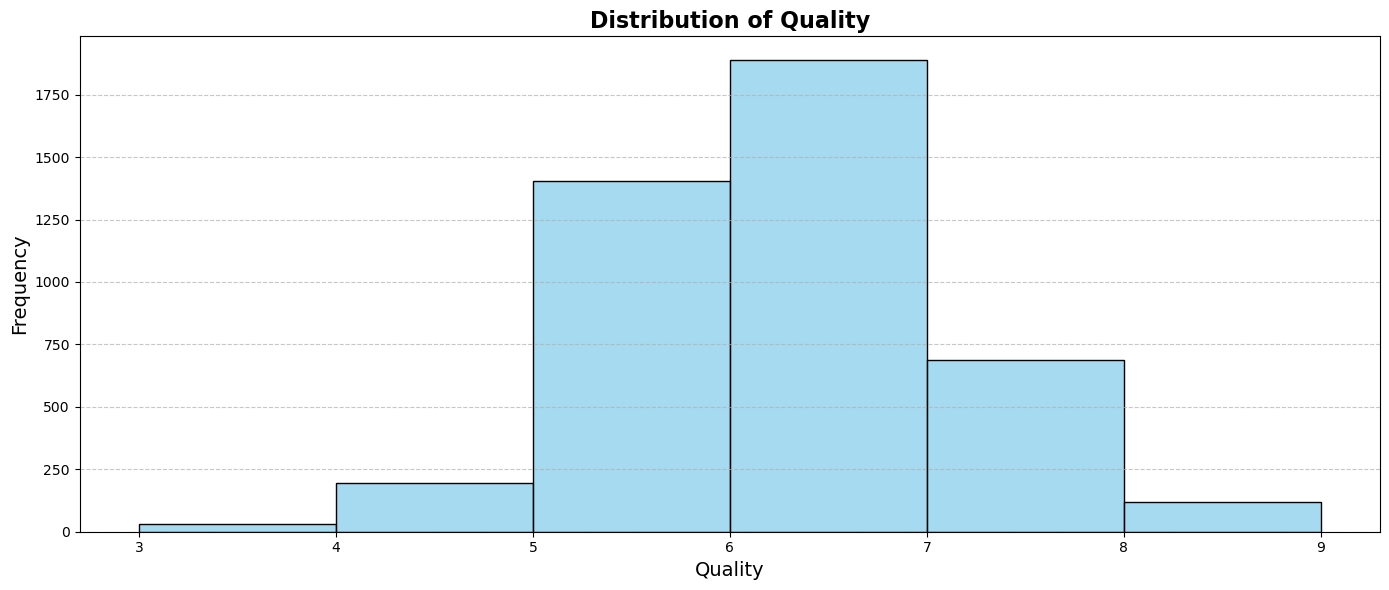

In [120]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create figure
plt.figure(figsize=(14, 6))

# Create histogram
sns.histplot(
    raw_df["quality"], 
    bins=6,        
    color="skyblue",  
    edgecolor="black" 
)

# Add label and titel
plt.title("Distribution of Quality", fontsize=16, fontweight='bold')
plt.xlabel("Quality", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Draw grid
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the graph
plt.tight_layout()
plt.show()

### Task 02: Aanalyzing acidity in red and white wine.

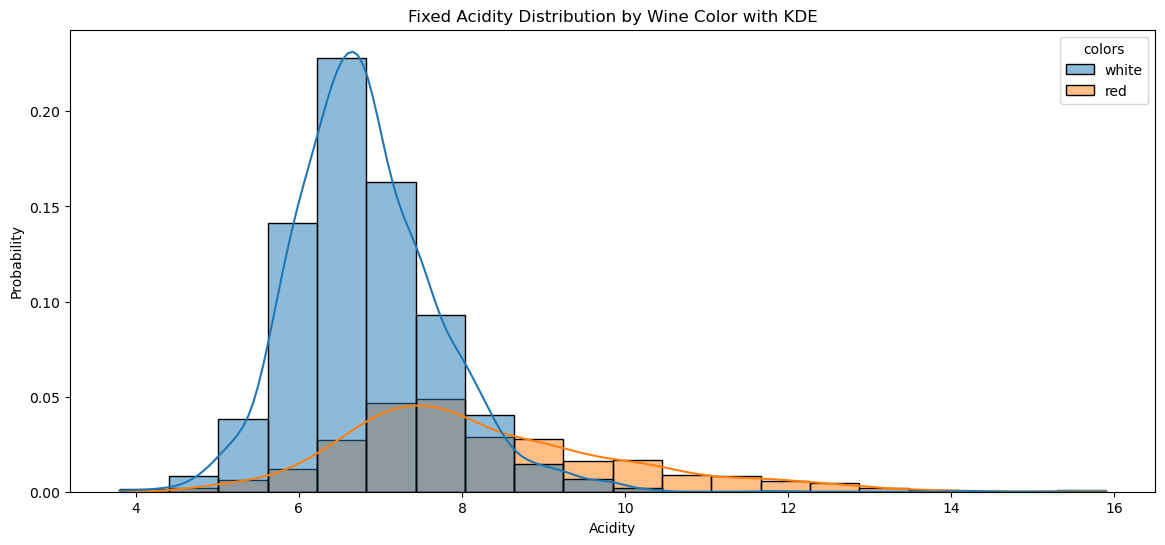

In [121]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create a figure with a size of (14, 6)
plt.figure(figsize=(14, 6))

# Draw Histogram with KDE
sns.histplot(data=raw_df, x='fixed acidity', hue='colors', kde=True, bins=20, stat='probability')
plt.title('Fixed Acidity Distribution by Wine Color with KDE')
plt.xlabel('Acidity')
plt.ylabel('Probability')
plt.show()


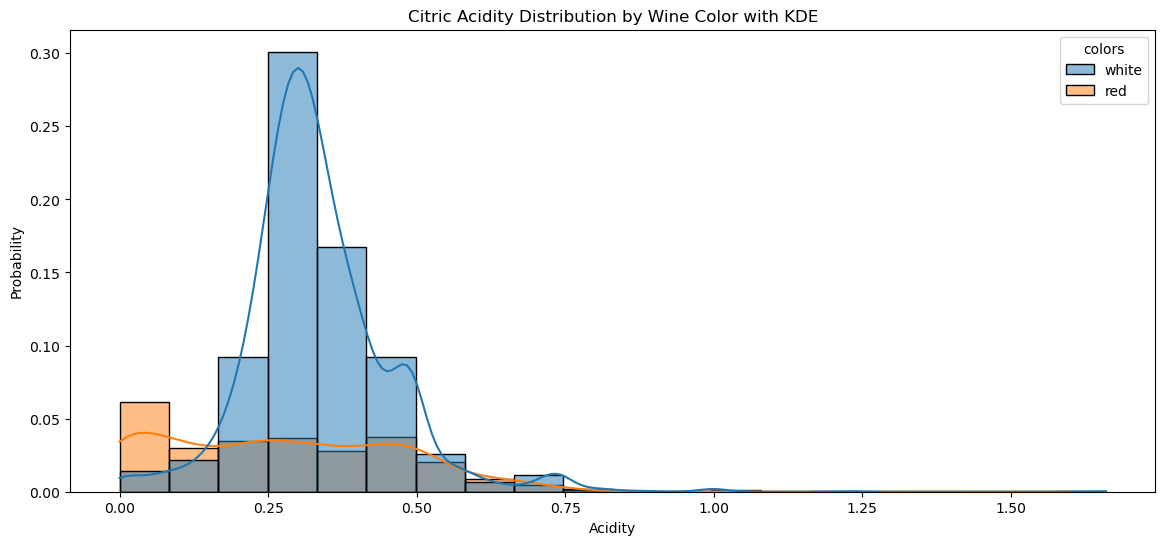

In [122]:
# YOUR CODE HERE
# raise NotImplementedError()
# Create a figure with a size of (14, 6)
plt.figure(figsize=(14, 6))

# Draw Histogram with KDE
sns.histplot(data=raw_df, x='citric acid', hue='colors', kde=True, bins=20, stat='probability')
plt.title('Citric Acidity Distribution by Wine Color with KDE')
plt.xlabel('Acidity')
plt.ylabel('Probability')
plt.show()

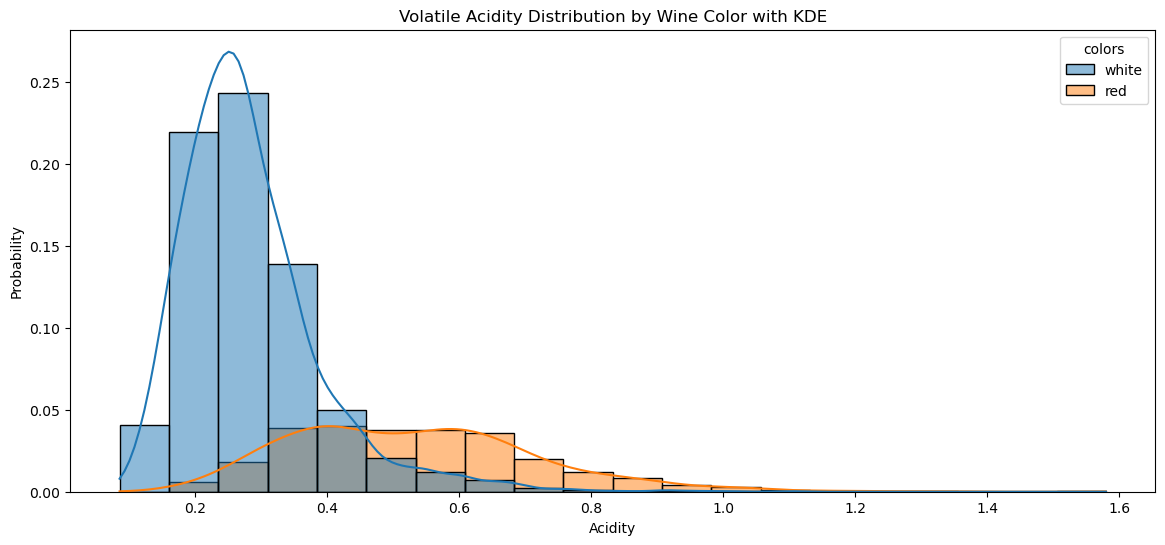

In [123]:
# YOUR CODE HERE
# raise NotImplementedError()
# Create a figure with a size of (14, 6)
plt.figure(figsize=(14, 6))
 
# Draw Histogram with KDE
sns.histplot(data=raw_df, x='volatile acidity', hue='colors', kde=True, bins=20, stat='probability')
plt.title('Volatile Acidity Distribution by Wine Color with KDE')
plt.xlabel('Acidity')
plt.ylabel('Probability')
plt.show()

### Task 03: Analyzing sulfur dioxide for each type of wines. Try to focus on the ratio of free and total sulfur.

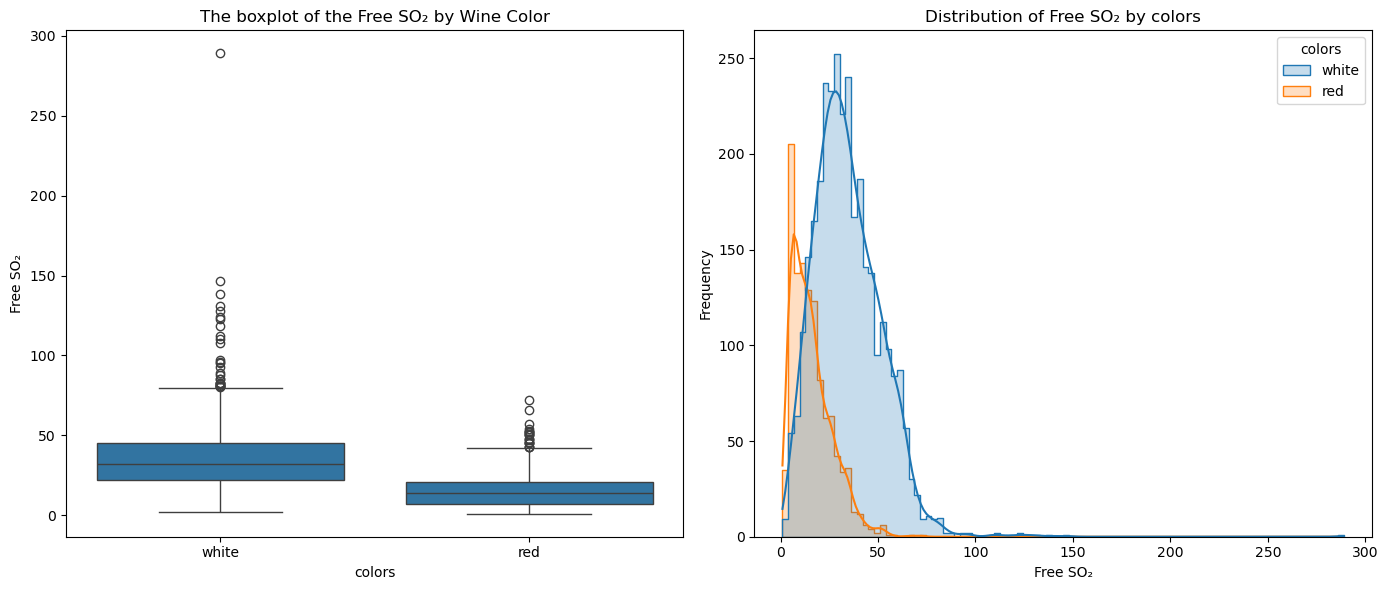

In [124]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create a figure and two subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='free sulfur dioxide', ax=axes[0])
axes[0].set_title('The boxplot of the Free SO₂ by Wine Color')
plt.xlabel('Wine Color')
axes[0].set_ylabel('Free SO₂')

# Histogram on the second subplot
sns.histplot(data=raw_df, x='free sulfur dioxide', hue='colors', kde=True, element='step', ax=axes[1])
axes[1].set_title('Distribution of Free SO₂ by colors')
axes[1].set_xlabel('Free SO₂')
axes[1].set_ylabel('Frequency')

# Adjust the layout to ensure plots do not overlap
plt.tight_layout()

# Display
plt.show()

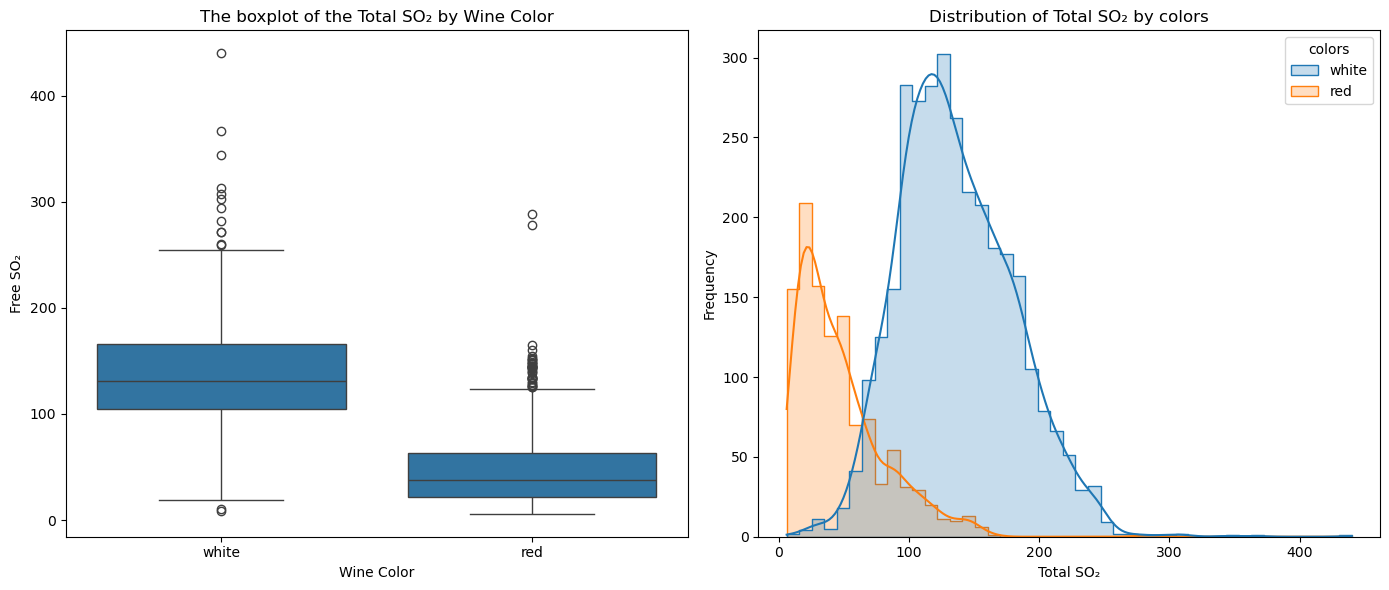

In [125]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='total sulfur dioxide', ax=axes[0])
axes[0].set_title('The boxplot of the Total SO₂ by Wine Color')
axes[0].set_xlabel('Wine Color')
axes[0].set_ylabel('Free SO₂')

# Histogram on the second subplot
sns.histplot(data=raw_df, x='total sulfur dioxide', hue='colors', kde=True, element='step', ax=axes[1])
axes[1].set_title('Distribution of Total SO₂ by colors')
axes[1].set_xlabel('Total SO₂')
axes[1].set_ylabel('Frequency')

# Adjust the layout so plots do not overlap
plt.tight_layout()

# Display the figure
plt.show()

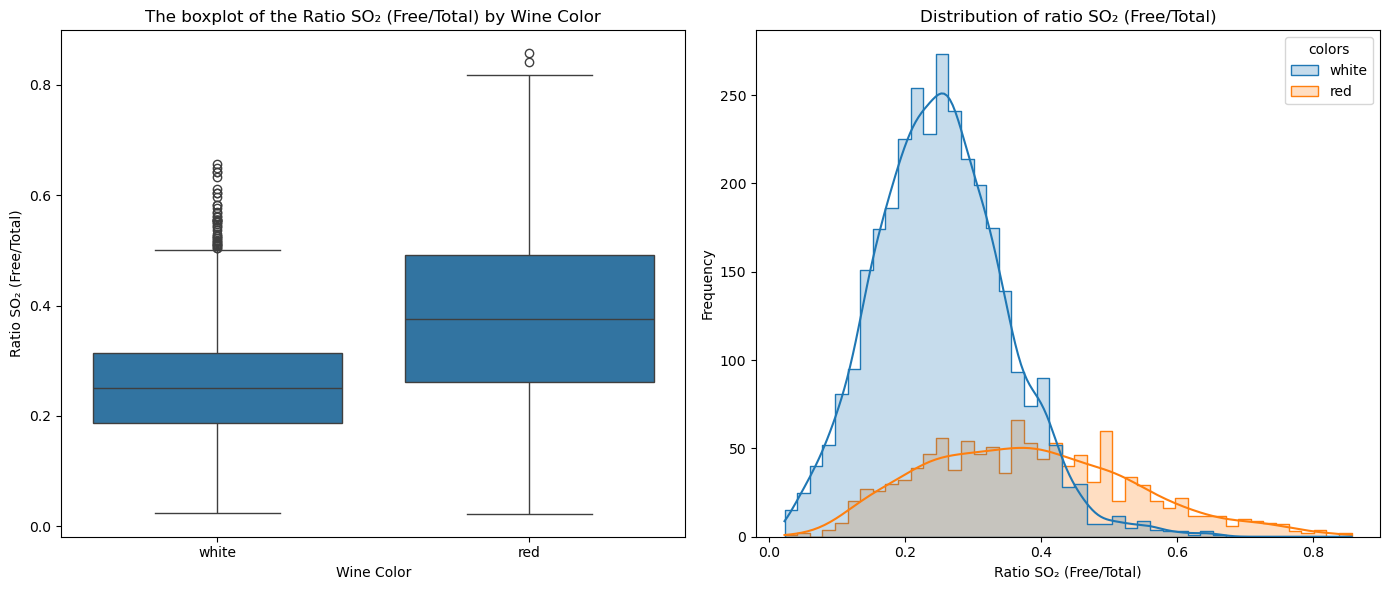

In [126]:
# YOUR CODE HERE
# raise NotImplementedError()
# There are some thing to be clear here:
# Free Sulfur Dioxide mean: The amount of SO₂ that is unbound and exists in a dissolved gaseous
# form in wine and this is the active portion responsible for protecting the wine.
# The total amount of SO₂ mean: both the free SO₂ and the bound SO₂. The bound portion consists
# of SO₂ that has combined with other components in the wine (e.g., sugars or aldehydes).
# Therefore, the Ratio (Free/Total SO₂): Indicates the efficiency of SO₂ in protecting the wine.
# A higher ratio means better preservation, as free SO₂ is the primary protective component.
# Because of these reasons, we gonna create a column that includes the ratio (Free/Total SO2)


# Then we calculate the ratio (Free/Total SO2)
raw_df['ratio'] = raw_df['free sulfur dioxide'] / raw_df['total sulfur dioxide']
# raw_df_copy.head()

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='ratio', ax=axes[0])
axes[0].set_title('The boxplot of the Ratio SO₂ (Free/Total) by Wine Color')
axes[0].set_xlabel('Wine Color')
axes[0].set_ylabel('Ratio SO₂ (Free/Total)')

# Histogram on the second subplot 
sns.histplot(data=raw_df, x='ratio', hue='colors', kde=True, element='step', ax=axes[1])
axes[1].set_title('Distribution of ratio SO₂ (Free/Total)')
axes[1].set_xlabel('Ratio SO₂ (Free/Total)')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display
plt.show()

### Task 04: What about the residual sugar? How does it affect wine quality?

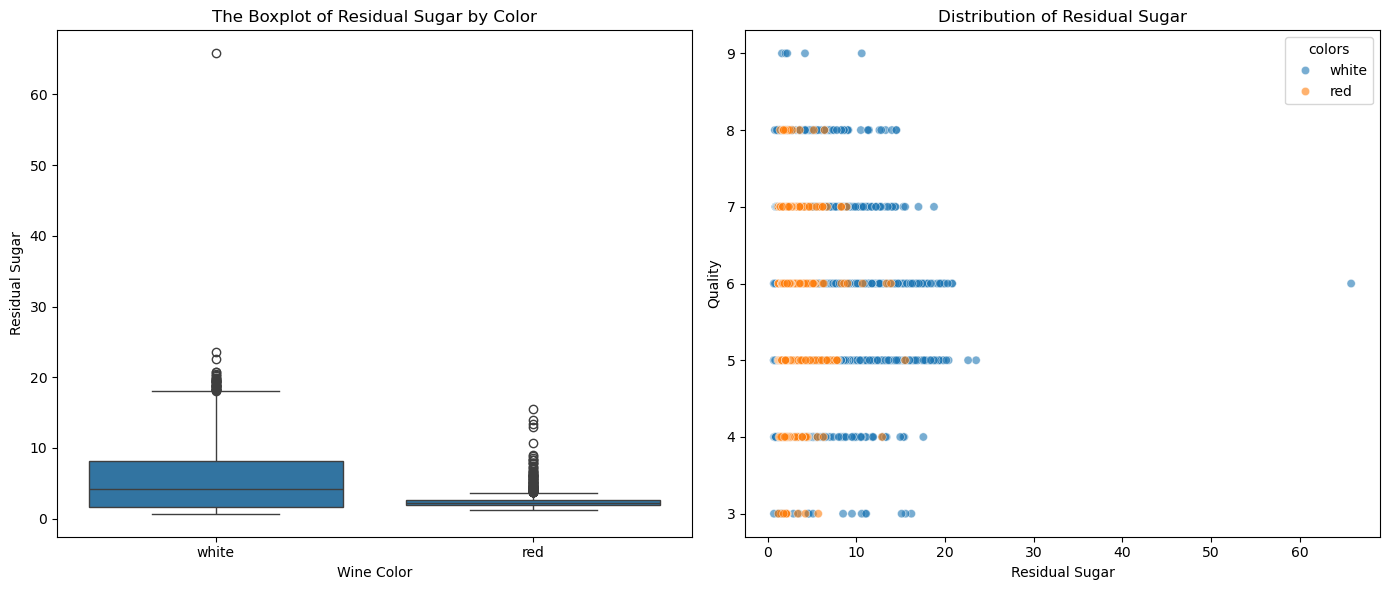

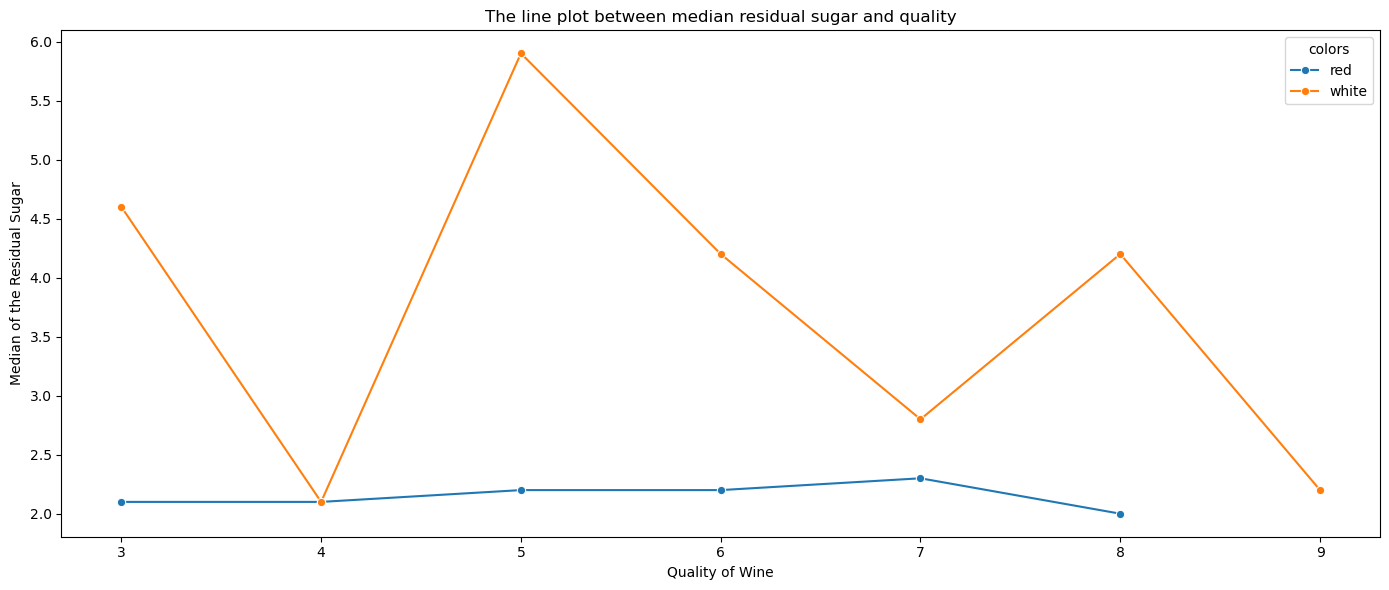

The statistic of the residual sugar and quality:
                min  median    max
colors quality                    
red    3        1.2     2.1   5.70
       4        1.3     2.1  12.90
       5        1.2     2.2  15.50
       6        1.2     2.2  13.90
       7        1.2     2.3   8.90
       8        1.4     2.0   6.40
white  3        0.7     4.6  16.20
       4        0.7     2.1  17.55
       5        0.7     5.9  23.50
       6        0.7     4.2  65.80
       7        0.9     2.8  18.75
       8        0.8     4.2  14.50
       9        1.6     2.2  10.60

Correlation between Quality and Residual Sugar: -0.06


In [127]:
# YOUR CODE HERE
# raise NotImplementedError()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='residual sugar', ax=axes[0])
axes[0].set_title("The Boxplot of Residual Sugar by Color")
axes[0].set_xlabel("Wine Color")
axes[0].set_ylabel("Residual Sugar")

# Scatterplot on the second subplot 
sns.scatterplot(data=raw_df, x='residual sugar', y='quality', hue='colors', ax=axes[1], alpha=0.6)
# sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='residual sugar', y='quality', scatter=False, color='red', label='Trend (Red Wine)')
# sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='residual sugar', y='quality', scatter=False, color='blue', label='Trend (White Wine)')
axes[1].set_title('Distribution of Residual Sugar')
axes[1].set_xlabel('Residual Sugar')
axes[1].set_ylabel('Quality')

# Adjust the layout
plt.tight_layout()

# Display
plt.show()

# Prepare the data for the visualizing
lineplot_data = raw_df.groupby(["colors", "quality"])["residual sugar"].agg(["min","median", "max"])

# Draw the line plot between median residual sugar and quality
plt.figure(figsize=(14, 6))
sns.lineplot(data=lineplot_data.reset_index(), x="quality", y="median", hue='colors', markers=True, dashes=False, marker='o')
plt.xlabel("Quality of Wine")
plt.ylabel("Median of the Residual Sugar")
plt.title("The line plot between median residual sugar and quality")
plt.tight_layout()
plt.show()

# Print the statistics data
print("The statistic of the residual sugar and quality:")
print(lineplot_data)

# Calculate the correlation between the quality and the residual sugar
correlation = raw_df['quality'].corr(raw_df['residual sugar'])

# Print the result
print(f"\nCorrelation between Quality and Residual Sugar: {correlation:.2f}")

# Comment: There appears to be no significant relationship between residual sugar and wine quality.


### Task 05: Alcohol plays a vital role in wine production. How does it affect wine quality?

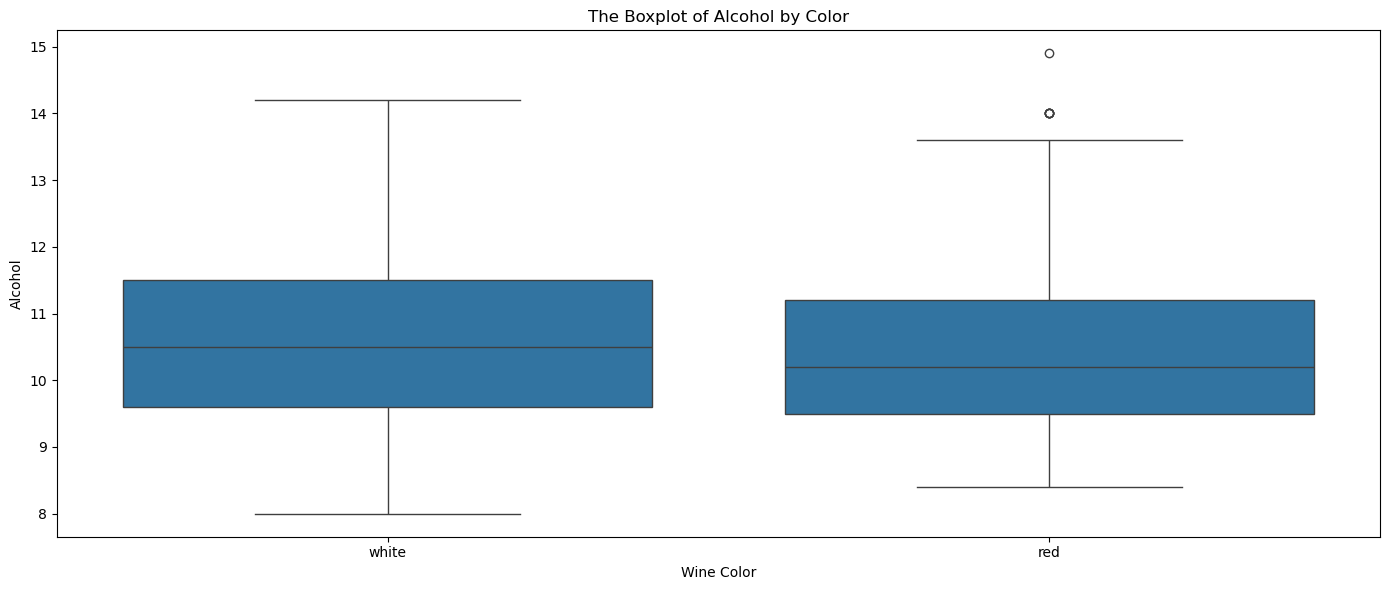


Correlation between Quality and Alcohol: 0.47


In [128]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.figure(figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='alcohol')
plt.title("The Boxplot of Alcohol by Color")
plt.xlabel("Wine Color")
plt.ylabel("Alcohol")
plt.tight_layout()
plt.show()

# Calculate the correlation between the quality and the alcohol
correlation = raw_df['quality'].corr(raw_df['alcohol'])
print(f"\nCorrelation between Quality and Alcohol: {correlation:.2f}")

# Comment: The alcohol content in white wine is slightly higher compared to red wine.
# There is a light relation between the quality and the alcohol content in the wine.
# The higher alcohol, the higher quality of the wine.

### Task 06: For each type of wine, how is density distributed? Is it importance to wine quality?

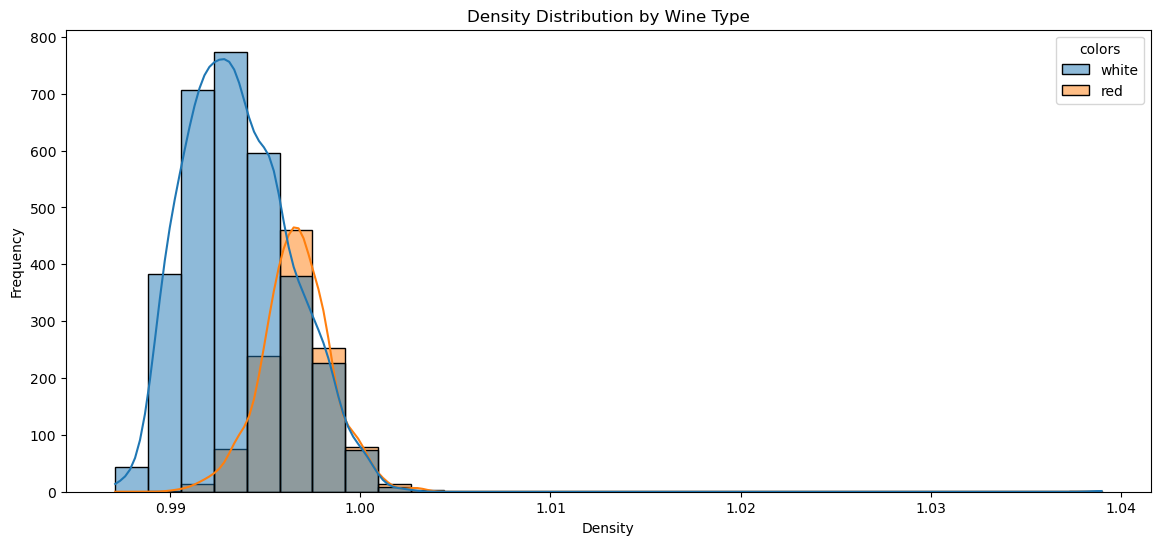


Correlation between Quality and Density: -0.33


In [129]:
# YOUR CODE HERE
# raise NotImplementedError()

plt.figure(figsize=(14, 6))

sns.histplot(data=raw_df, x='density', kde=True, bins=30, hue='colors')
plt.title("Density Distribution by Wine Type")
plt.xlabel("Density")
plt.ylabel("Frequency")

plt.show()

# Calculate the correlation between the quality and the alcohol
correlation = raw_df['quality'].corr(raw_df['density'])
print(f"\nCorrelation between Quality and Density: {correlation:.2f}")
# Comment: White wine has a lower density compared to red wine, meaning white wine is generally lighter than red wine.
# It's importance to wine quality too (shown in their correlation statistic)


### Task 07: How are Chloride characteristics distributed in these two types of wines? 

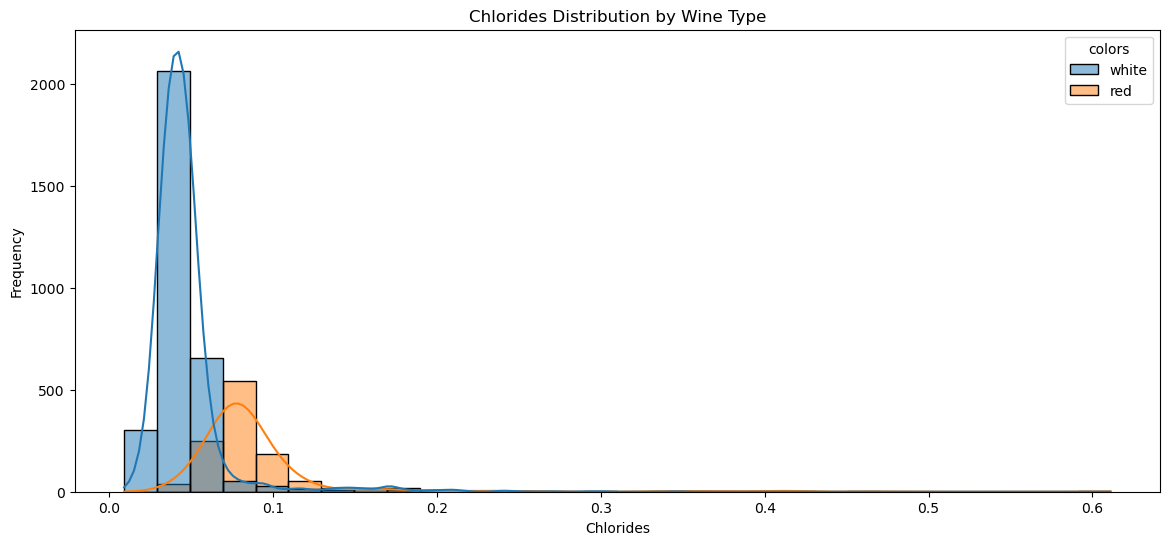

In [130]:
# YOUR CODE HERE
# raise NotImplementedError()
# raw_df.head()

plt.figure(figsize=(14, 6))

# Plot the chlorides attribute in histplot diagram
sns.histplot(data=raw_df, x='chlorides', kde=True, bins=30, hue='colors')
plt.title("Chlorides Distribution by Wine Type")
plt.xlabel("Chlorides")
plt.ylabel("Frequency")
plt.show()

# Comment: White wines have lower chloride levels than red wines, shown by their distribution being shifted left.

## Analyze the correlation between two or more variables

### Task 08: Correlation matrix analysis

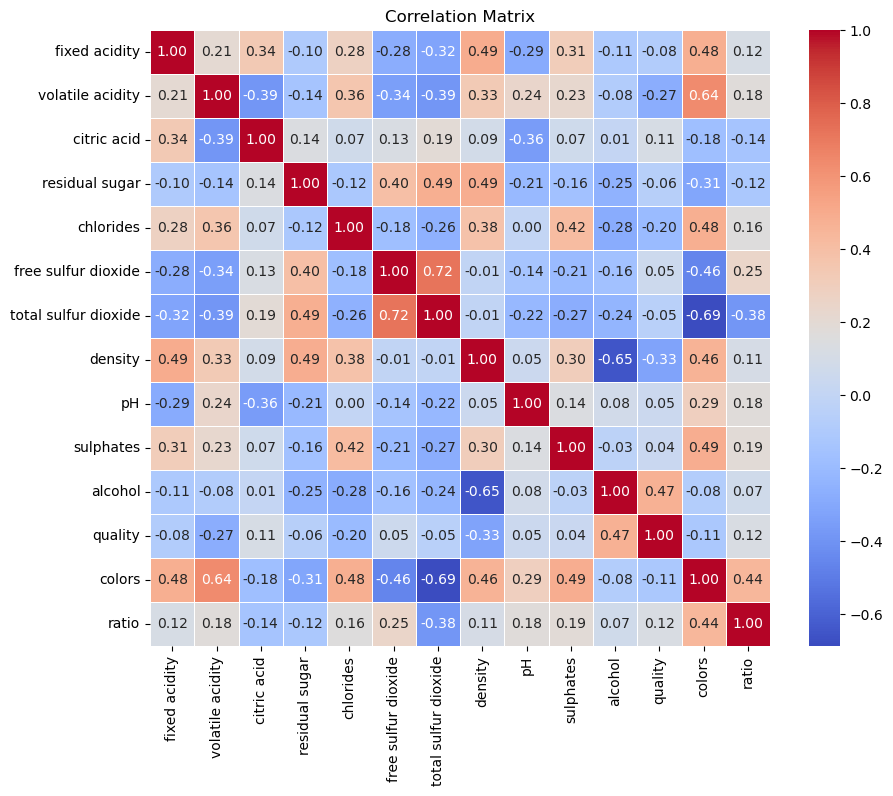

In [131]:
# YOUR CODE HERE
# raise NotImplementedError()

# Make some changes to the dataset to suitable to create a correlation matrix
raw_df_copy = raw_df.copy()
raw_df_copy['colors'] = raw_df_copy['colors'].map({'white': 0, 'red': 1})

# Create a correlation matrix
correlation_matrix = raw_df_copy.corr()

# Draw a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### Analysis of the influence of variables on wine quality

#### Task 09: Investigating the relationship between `Density` and `Quality`

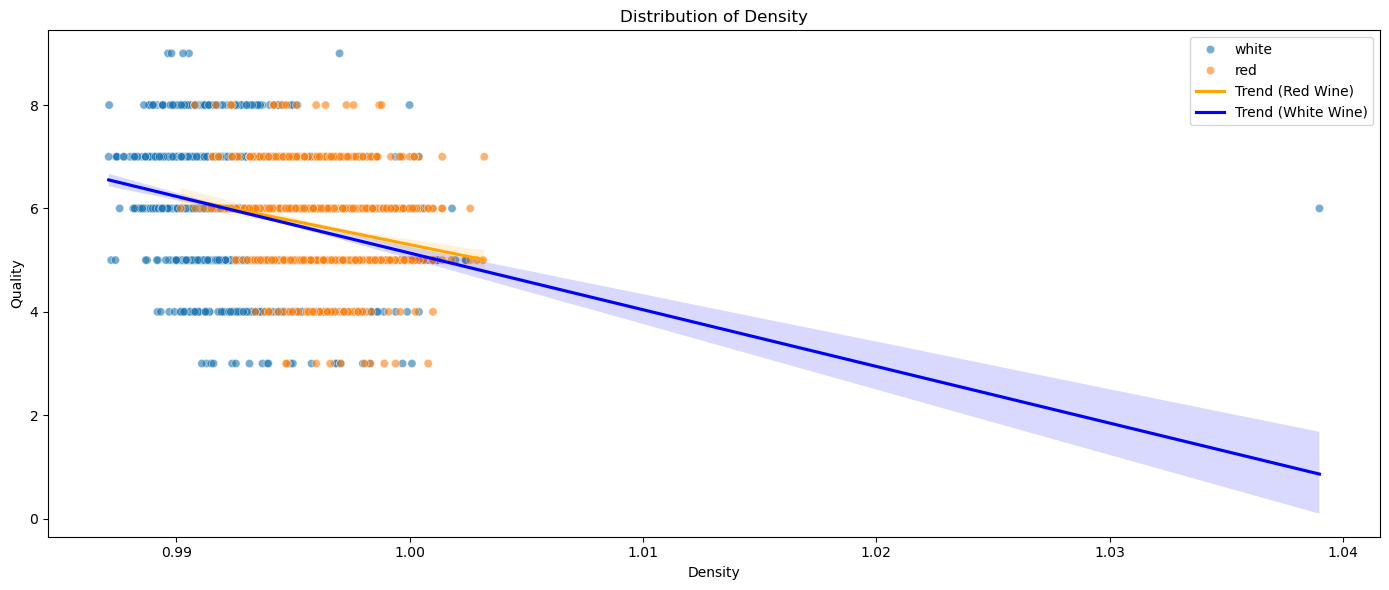

In [132]:
# YOUR CODE HERE
# raise NotImplementedError()
# Scatter plotplot on the second subplot 

plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='density', y='quality', hue='colors', alpha=0.6)
sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='density', y='quality', scatter=False, color='orange', label='Trend (Red Wine)')
sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='density', y='quality', scatter=False, color='blue', label='Trend (White Wine)')
plt.title('Distribution of Density')
plt.xlabel('Density')
plt.ylabel('Quality')
plt.legend()
plt.tight_layout()
plt.show()


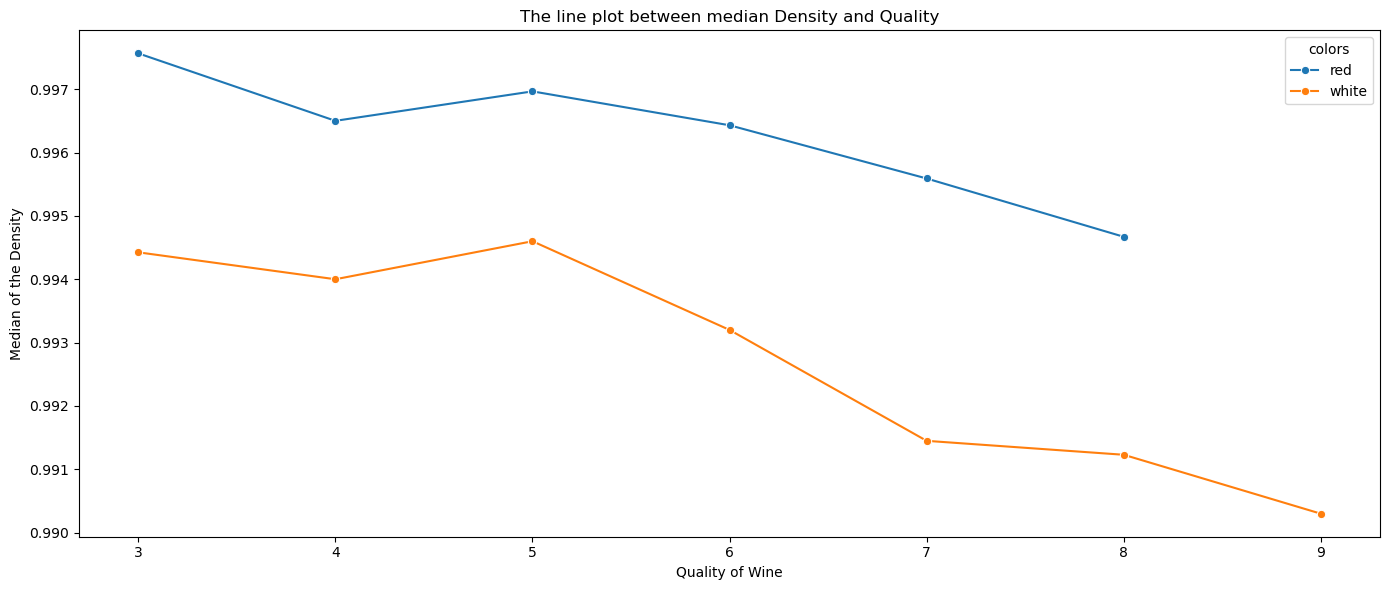

The statistic of the Density and Quality:
                    min    median      max
colors quality                            
red    3        0.99471  0.997565  1.00080
       4        0.99340  0.996500  1.00100
       5        0.99256  0.996965  1.00315
       6        0.99020  0.996430  1.00260
       7        0.99154  0.995590  1.00320
       8        0.99080  0.994670  0.99880
white  3        0.99110  0.994425  1.00010
       4        0.98920  0.994000  1.00040
       5        0.98722  0.994600  1.00241
       6        0.98758  0.993200  1.03898
       7        0.98711  0.991450  1.00040
       8        0.98713  0.991230  1.00000
       9        0.98965  0.990300  0.99700

Correlation between Quality and Density: -0.33


In [133]:
# YOUR CODE HERE
# raise NotImplementedError()
# Prepare the data for the visualizing
lineplot_data = raw_df.groupby(["colors", "quality"])["density"].agg(["min","median", "max"])

# Draw the line plot between median density and quality
plt.figure(figsize=(14, 6))
sns.lineplot(data=lineplot_data.reset_index(), x="quality", y="median", hue='colors', markers=True, dashes=False, marker='o')
plt.xlabel("Quality of Wine")
plt.ylabel("Median of the Density")
plt.title("The line plot between median Density and Quality")
plt.tight_layout()
plt.show()

# Print the statistics data
print("The statistic of the Density and Quality:")
print(lineplot_data)

# Calculate the correlation between the quality and the density
correlation = raw_df['quality'].corr(raw_df['density'])

# Print the result
print(f"\nCorrelation between Quality and Density: {correlation:.2f}")

#### Task 10: Investigating the relationship between `Alcohol` and `Quality`

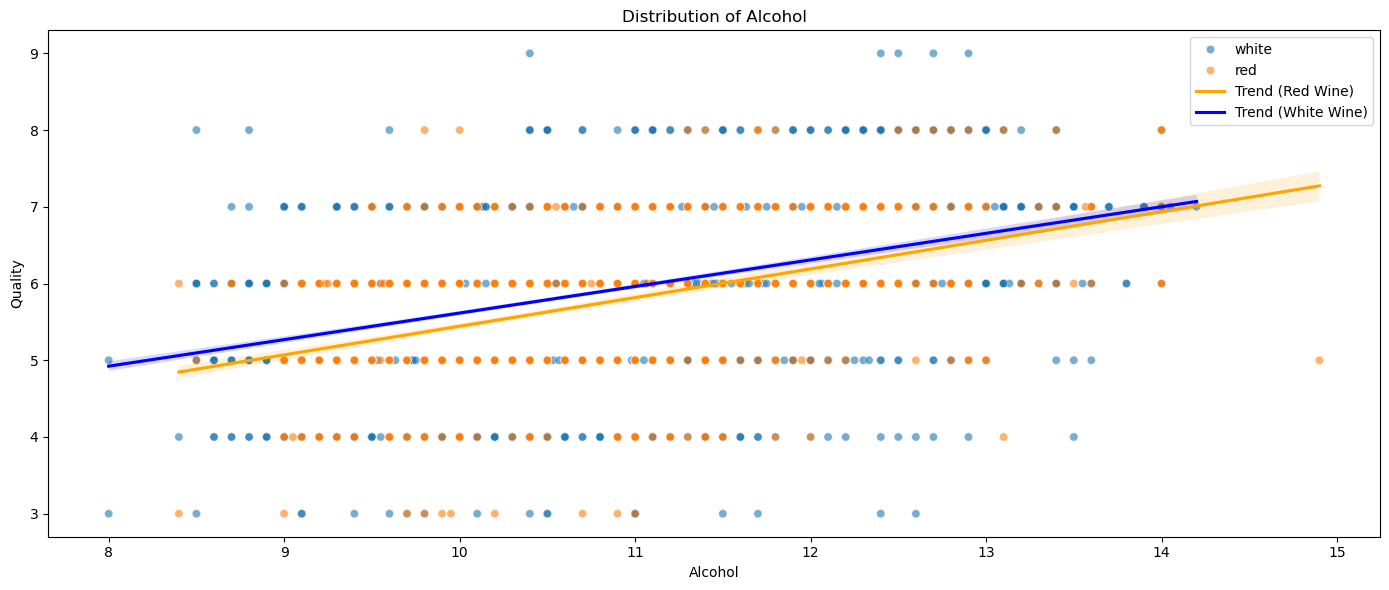

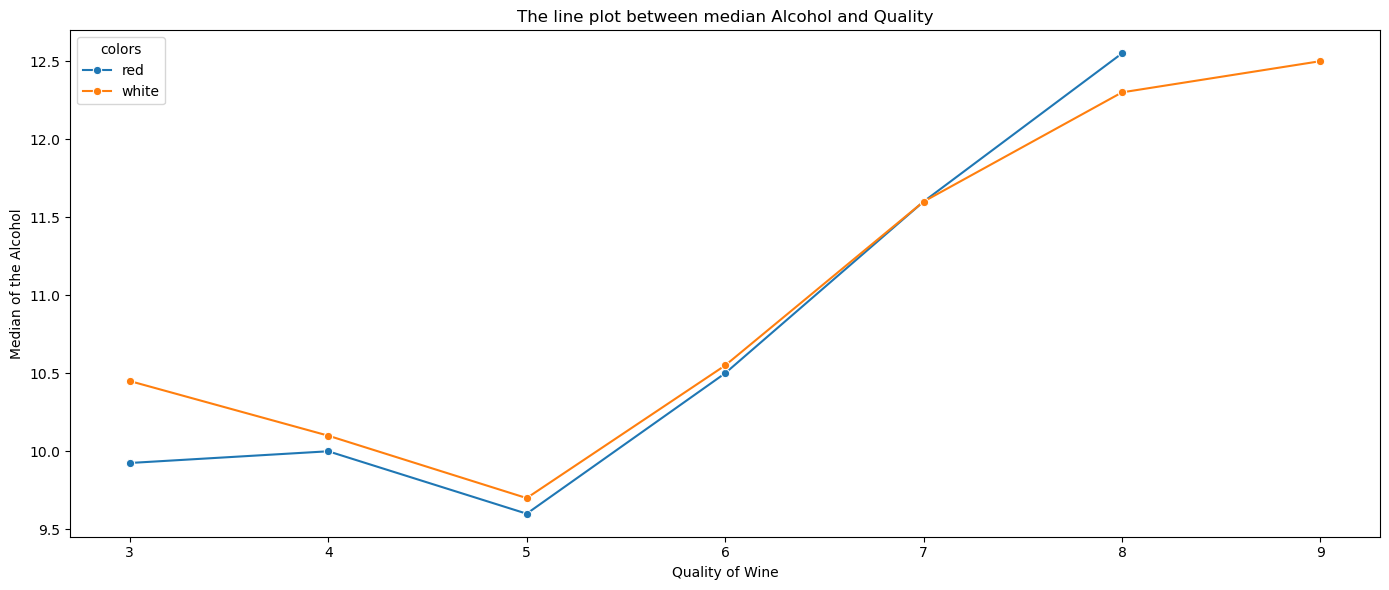

The statistic of the Alcohol and Quality:
                 min  median   max
colors quality                    
red    3         8.4   9.925  11.0
       4         9.0  10.000  13.1
       5         8.5   9.600  14.9
       6         8.4  10.500  14.0
       7         9.5  11.600  14.0
       8         9.8  12.550  14.0
white  3         8.0  10.450  12.6
       4         8.4  10.100  13.5
       5         8.0   9.700  13.6
       6         8.5  10.550  14.0
       7         8.7  11.600  14.2
       8         8.5  12.300  14.0
       9        10.4  12.500  12.9

Correlation between Quality and Alcohol: 0.47


In [134]:
# YOUR CODE HERE
# raise NotImplementedError()

# Scatter plotplot on the second subplot 
plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='alcohol', y='quality', hue='colors', alpha=0.6)
sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='alcohol', y='quality', scatter=False, color='orange', label='Trend (Red Wine)')
sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='alcohol', y='quality', scatter=False, color='blue', label='Trend (White Wine)')
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()
plt.tight_layout()
plt.show()

# Prepare the data for the visualizing
lineplot_data = raw_df.groupby(["colors", "quality"])["alcohol"].agg(["min","median", "max"])

# Draw the line plot between median alcohol and quality
plt.figure(figsize=(14, 6))
sns.lineplot(data=lineplot_data.reset_index(), x="quality", y="median", hue='colors', markers=True, dashes=False, marker='o')
plt.xlabel("Quality of Wine")
plt.ylabel("Median of the Alcohol")
plt.title("The line plot between median Alcohol and Quality")
plt.tight_layout()
plt.show()

# Print the statistics data
print("The statistic of the Alcohol and Quality:")
print(lineplot_data)

# Calculate the correlation between the quality and the alcohol
correlation = raw_df['quality'].corr(raw_df['alcohol'])
print(f"\nCorrelation between Quality and Alcohol: {correlation:.2f}")

#### Task 11: Investigating the relationship between `Chlorides` and `Quality`

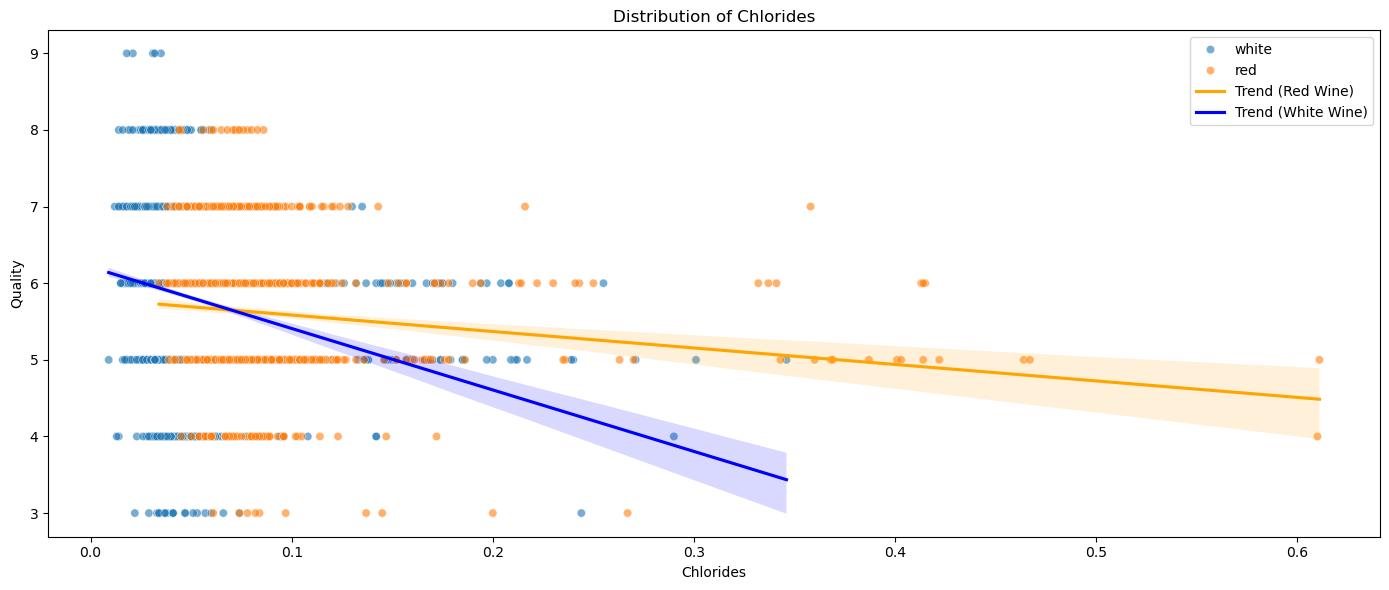

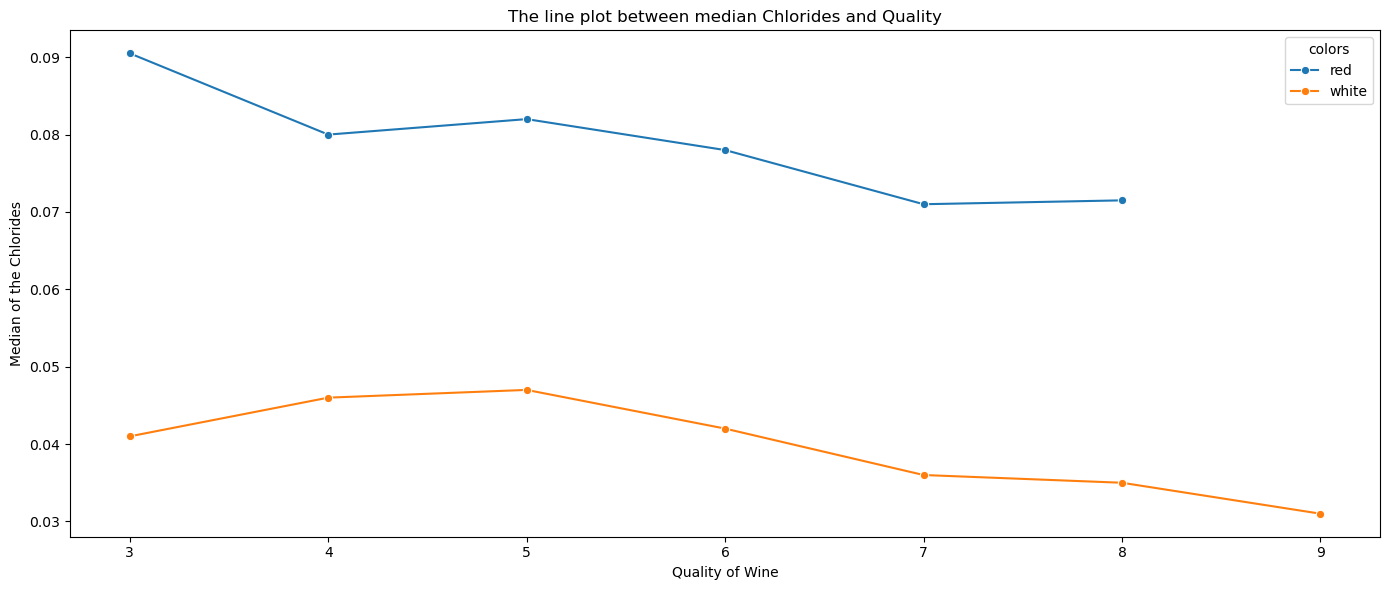

The statistic of the Chlorides and Quality:
                  min  median    max
colors quality                      
red    3        0.061  0.0905  0.267
       4        0.045  0.0800  0.610
       5        0.039  0.0820  0.611
       6        0.034  0.0780  0.415
       7        0.038  0.0710  0.358
       8        0.044  0.0715  0.086
white  3        0.022  0.0410  0.244
       4        0.013  0.0460  0.290
       5        0.009  0.0470  0.346
       6        0.015  0.0420  0.255
       7        0.012  0.0360  0.135
       8        0.014  0.0350  0.060
       9        0.018  0.0310  0.035

Correlation between Quality and Chlorides: -0.20


In [135]:
# YOUR CODE HERE
# raise NotImplementedError()
# YOUR CODE HERE
# raise NotImplementedError()

# Scatter plotplot on the second subplot 
plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='chlorides', y='quality', hue='colors', alpha=0.6)
sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='chlorides', y='quality', scatter=False, color='orange', label='Trend (Red Wine)')
sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='chlorides', y='quality', scatter=False, color='blue', label='Trend (White Wine)')
plt.title('Distribution of Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.legend()
plt.tight_layout()
plt.show()

# Prepare the data for the visualizing
lineplot_data = raw_df.groupby(["colors", "quality"])["chlorides"].agg(["min","median", "max"])

# Draw the line plot between median chlorides and quality
plt.figure(figsize=(14, 6))
sns.lineplot(data=lineplot_data.reset_index(), x="quality", y="median", hue='colors', markers=True, dashes=False, marker='o')
plt.xlabel("Quality of Wine")
plt.ylabel("Median of the Chlorides")
plt.title("The line plot between median Chlorides and Quality")
plt.tight_layout()
plt.show()

# Print the statistics data
print("The statistic of the Chlorides and Quality:")
print(lineplot_data)

# Calculate the correlation between the quality and the alcohol
correlation = raw_df['quality'].corr(raw_df['chlorides'])
print(f"\nCorrelation between Quality and Chlorides: {correlation:.2f}")

#### Task 12: Investigating the relationship between `Volatile Acidity` and `Quality`

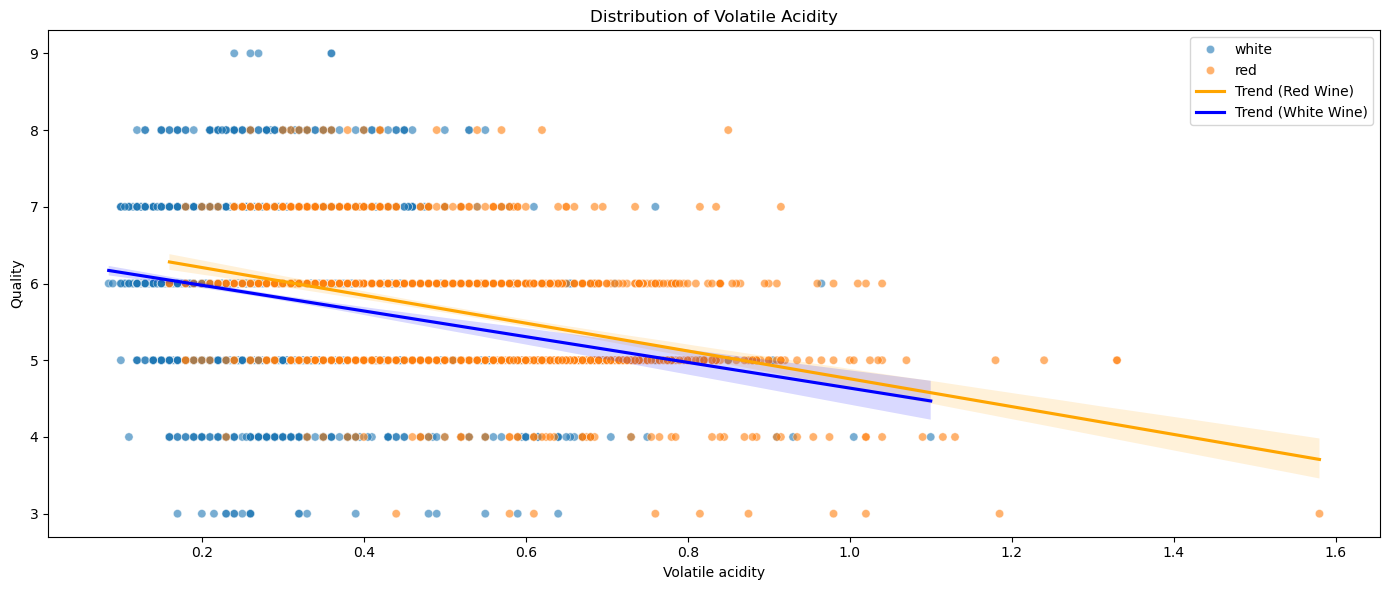

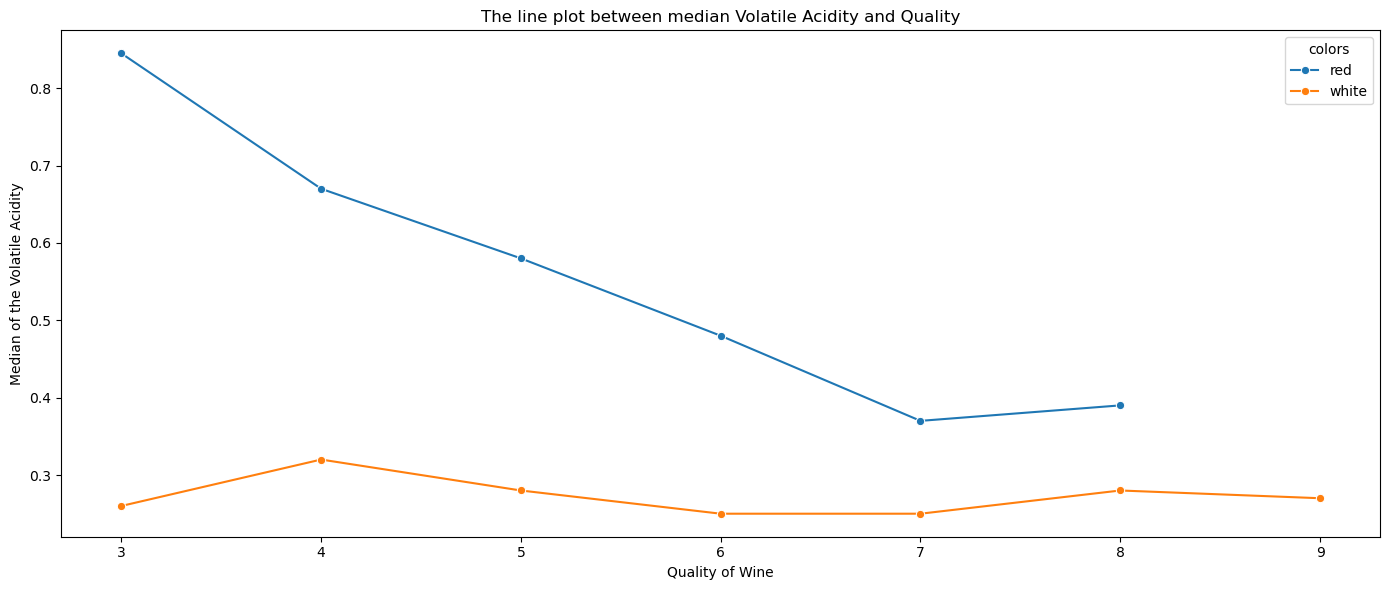

The statistic of the Volatile Acidity and Quality:
                  min  median    max
colors quality                      
red    3        0.440   0.845  1.580
       4        0.230   0.670  1.130
       5        0.180   0.580  1.330
       6        0.160   0.480  1.040
       7        0.180   0.370  0.915
       8        0.260   0.390  0.850
white  3        0.170   0.260  0.640
       4        0.110   0.320  1.100
       5        0.100   0.280  0.905
       6        0.085   0.250  0.965
       7        0.100   0.250  0.760
       8        0.120   0.280  0.550
       9        0.240   0.270  0.360

Correlation between Quality and Volatile Acidity: -0.27


In [136]:
# YOUR CODE HERE
# raise NotImplementedError()
# raw_df.head()

# Scatter plotplot on the second subplot 
plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='volatile acidity', y='quality', hue='colors', alpha=0.6)
sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='volatile acidity', y='quality', scatter=False, color='orange', label='Trend (Red Wine)')
sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='volatile acidity', y='quality', scatter=False, color='blue', label='Trend (White Wine)')
plt.title('Distribution of Volatile Acidity')
plt.xlabel('Volatile acidity')
plt.ylabel('Quality')
plt.legend()
plt.tight_layout()
plt.show()

# Prepare the data for the visualizing
lineplot_data = raw_df.groupby(["colors", "quality"])["volatile acidity"].agg(["min","median", "max"])

# Draw the line plot between median volatile acidity and quality
plt.figure(figsize=(14, 6))
sns.lineplot(data=lineplot_data.reset_index(), x="quality", y="median", hue='colors', markers=True, dashes=False, marker='o')
plt.xlabel("Quality of Wine")
plt.ylabel("Median of the Volatile Acidity")
plt.title("The line plot between median Volatile Acidity and Quality")
plt.tight_layout()
plt.show()

# Print the statistics data
print("The statistic of the Volatile Acidity and Quality:")
print(lineplot_data)

# Calculate the correlation between the quality and the volatile acidity
correlation = raw_df['quality'].corr(raw_df['volatile acidity'])
print(f"\nCorrelation between Quality and Volatile Acidity: {correlation:.2f}")

#### Task 13: Investigation of the relationship between total SO2 and residual sugar after fermentation

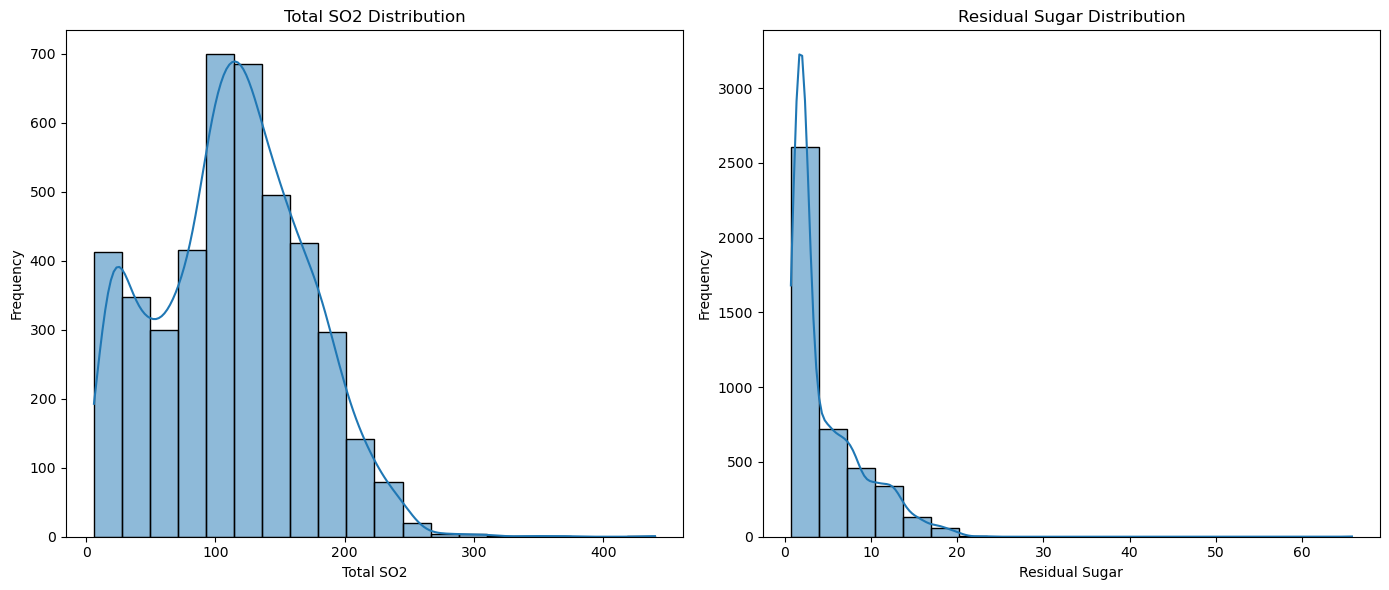

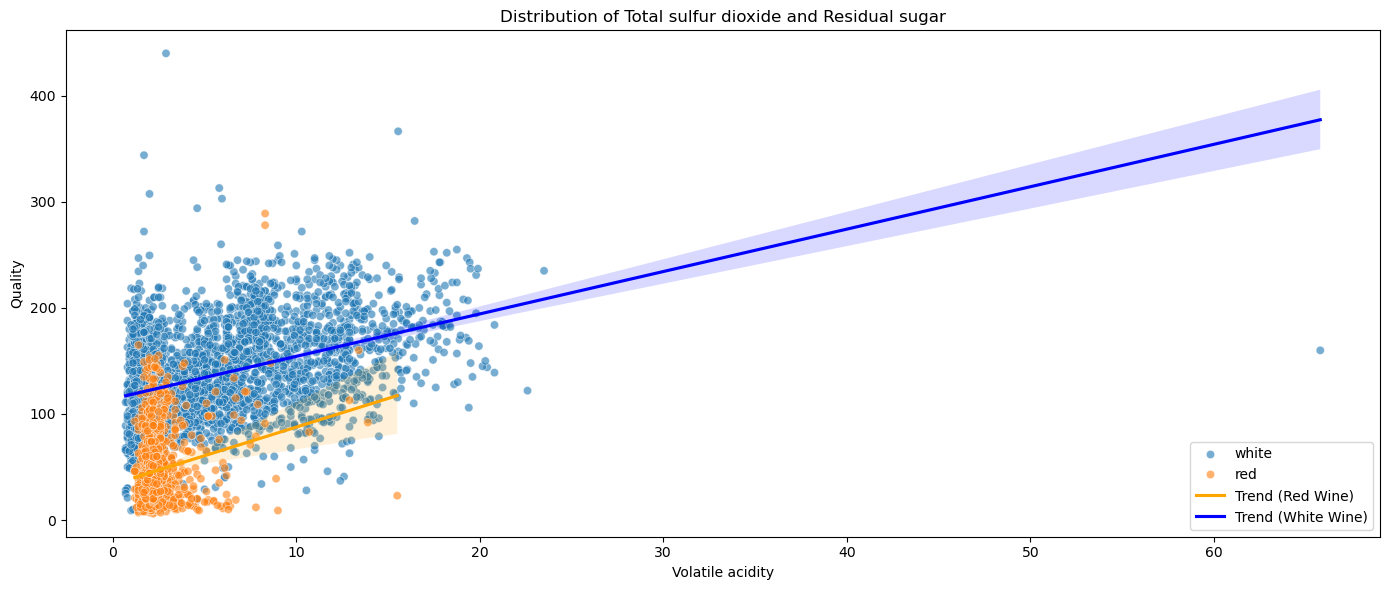


Correlation between residual sugar and total sulfur dioxide: 0.49


In [137]:
# YOUR CODE HERE
# raise NotImplementedError()
# raw_df.head()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total SO2 Distribution
sns.histplot(data=raw_df, x='total sulfur dioxide', kde=True, ax=axes[0], bins=20)
axes[0].set_title('Total SO2 Distribution')
axes[0].set_xlabel('Total SO2')
axes[0].set_ylabel('Frequency')

# Residual Sugar Distribution
sns.histplot(data=raw_df, x='residual sugar', kde=True, ax=axes[1], bins=20)
axes[1].set_title('Residual Sugar Distribution')
axes[1].set_xlabel('Residual Sugar')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plotplot on the second subplot 
plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='residual sugar', y='total sulfur dioxide', hue='colors', alpha=0.6)
sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='residual sugar', y='total sulfur dioxide', scatter=False, color='orange', label='Trend (Red Wine)')
sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='residual sugar', y='total sulfur dioxide', scatter=False, color='blue', label='Trend (White Wine)')
plt.title('Distribution of Total sulfur dioxide and Residual sugar')
plt.xlabel('Volatile acidity')
plt.ylabel('Quality')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate the correlation between the total sulfur dioxide and the residual sugar
correlation = raw_df['total sulfur dioxide'].corr(raw_df['residual sugar'])
print(f"\nCorrelation between residual sugar and total sulfur dioxide: {correlation:.2f}")

#### Task 14: Investigation of the impact of alcohol concentration and sugar content on alcohol density

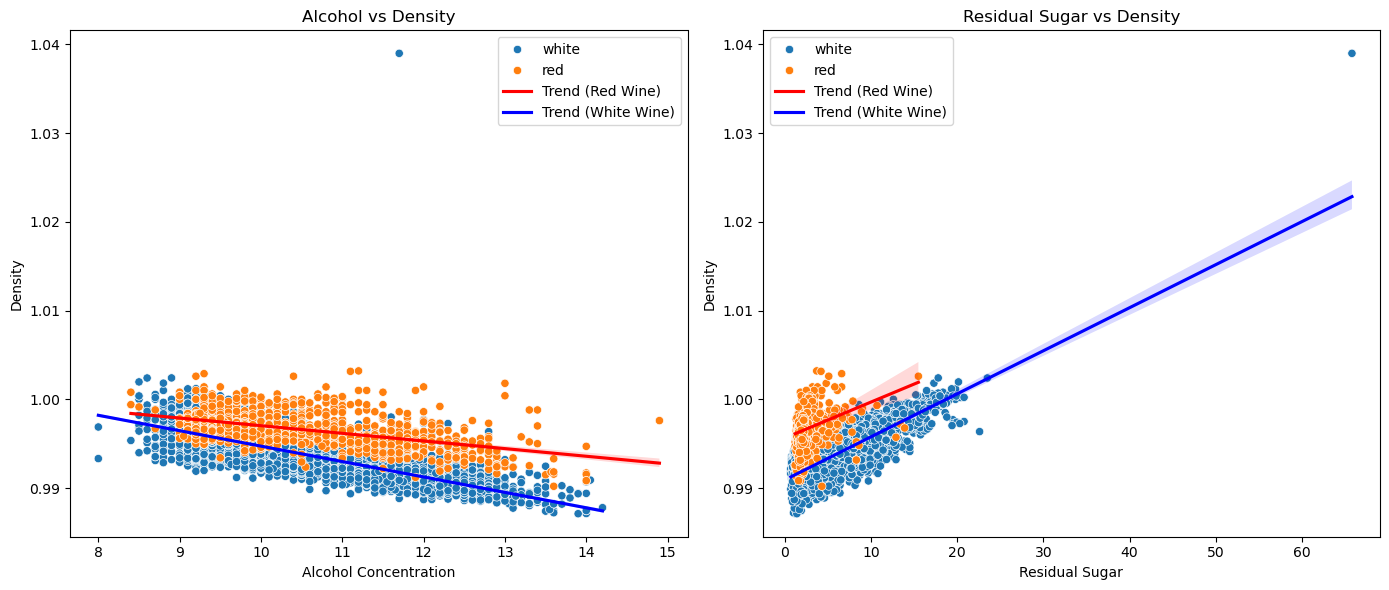


Correlation between alcohol, residual sugar VS density:


,alcohol,residual sugar
density,-0.650538,0.492298


In [138]:
# YOUR CODE HERE
# raise NotImplementedError()

# 1. Scatterplot of alcohol, residual sugar vs residual sugar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Alcohol vs Density
sns.scatterplot(data=raw_df, x='alcohol', y='density', hue='colors', ax=axes[0])
sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='alcohol', y='density', scatter=False, color='red', label='Trend (Red Wine)', ax=axes[0])
sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='alcohol', y='density', scatter=False, color='blue', label='Trend (White Wine)', ax=axes[0])
axes[0].set_title('Alcohol vs Density')
axes[0].set_xlabel('Alcohol Concentration')
axes[0].set_ylabel('Density')
axes[0].legend()

# Residual Sugar vs Density
sns.scatterplot(data=raw_df, x='residual sugar', y='density', hue='colors', ax=axes[1])
sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='residual sugar', y='density', scatter=False, color='red', label='Trend (Red Wine)', ax=axes[1])
sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='residual sugar', y='density', scatter=False, color='blue', label='Trend (White Wine)', ax=axes[1])
axes[1].set_title('Residual Sugar vs Density')
axes[1].set_xlabel('Residual Sugar')
axes[1].set_ylabel('Density')
axes[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Calculate the correlation among alcohol and residual sugar and density
correlation = raw_df[['alcohol', 'residual sugar', 'density']].corr()
correlation = correlation.iloc[2:,:-1]
print(f"\nCorrelation between alcohol, residual sugar VS density:")
correlation

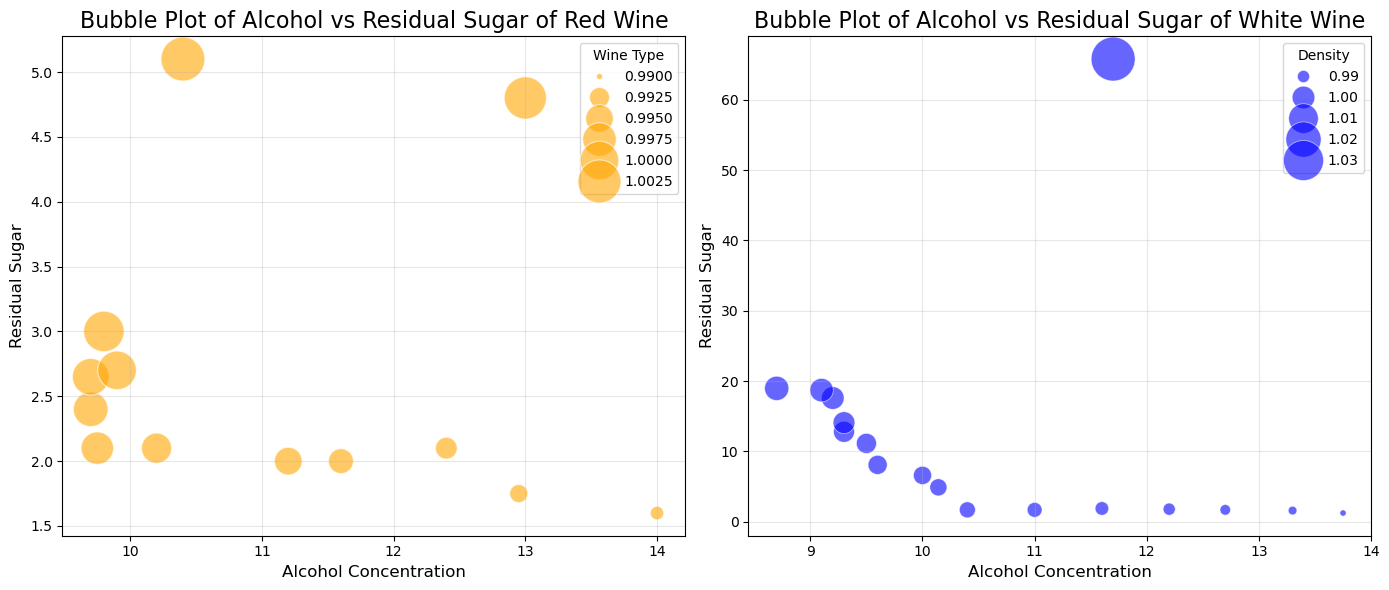

In [139]:
# YOUR CODE HERE
# raise NotImplementedError()

# 2. Bubble plot 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Prepare dataset to visualize
data_visualization = raw_df.copy()
data_visualization['density'] = data_visualization['density'].round(3)
data_visualization = data_visualization.groupby(['colors', 'density'])[['alcohol', 'residual sugar']].agg(['median']).reset_index()
data_visualization.columns = ['colors', 'density', 'alcohol', 'residual sugar']
red_data = data_visualization[data_visualization['colors'] == 'red']
white_data = data_visualization[data_visualization['colors'] == 'white']

# Bubble plot with red dataset
bubble_plot = sns.scatterplot(
    data=red_data,
    x='alcohol',
    y='residual sugar',
    size='density',              # Size density
    sizes=(20, 1000),            # Set range (min, max)
    color='orange',              # Set color
    alpha=0.6,                   # Opacity
    ax=axes[0]
)

# Set title and label
axes[0].set_title("Bubble Plot of Alcohol vs Residual Sugar of Red Wine", fontsize=16)
axes[0].set_xlabel("Alcohol Concentration", fontsize=12)
axes[0].set_ylabel("Residual Sugar", fontsize=12)
axes[0].legend(title="Wine Type", loc='upper right', fontsize=10)
axes[0].grid(alpha=0.3)

#--------#
# Bubble plot with white dataset
bubble_plot = sns.scatterplot(
    data=white_data,
    x='alcohol',
    y='residual sugar',
    size='density',              # Size density
    sizes=(20, 1000),            # Set range (min, max)
    color='blue',                # Set color
    alpha=0.6,                   # Opacity 
    ax=axes[1]
)

# Set title and label
axes[1].set_title("Bubble Plot of Alcohol vs Residual Sugar of White Wine", fontsize=16)
axes[1].set_xlabel("Alcohol Concentration", fontsize=12)
axes[1].set_ylabel("Residual Sugar", fontsize=12)
axes[1].legend(title="Density", loc='upper right', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Analysis based on wine color

#### Task 15: Analyze the relationship between color and density of wine

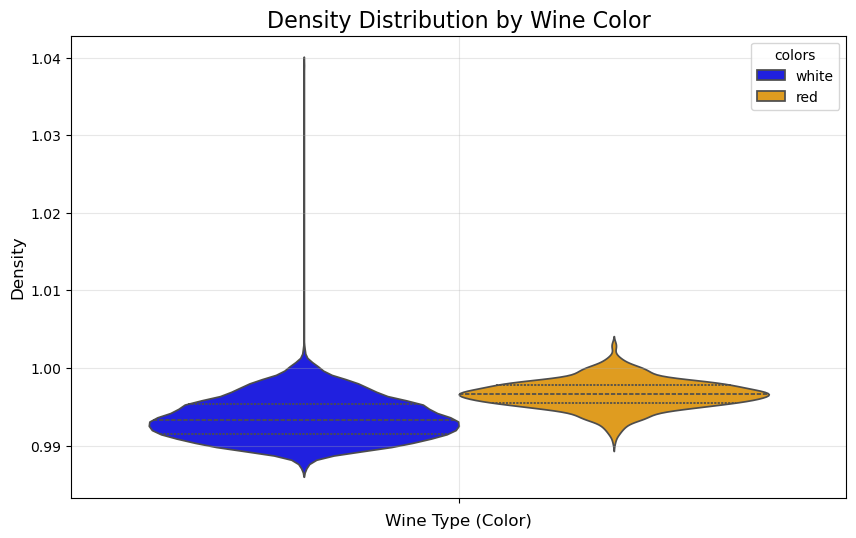

         count      mean       std      min      25%      50%     75%      max
colors                                                                        
red     1139.0  0.996648  0.001835  0.99020  0.99554  0.99666  0.9978  1.00320
white   3189.0  0.993592  0.002821  0.98711  0.99150  0.99331  0.9954  1.03898


In [140]:
# YOUR CODE HERE
# raise NotImplementedError()
# Violin plot to compare density by wine color
plt.figure(figsize=(10, 6))
sns.violinplot(data=raw_df, hue='colors', y='density', palette={'red': 'orange', 'white': 'blue'}, inner='quartile')
plt.title("Density Distribution by Wine Color", fontsize=16)
plt.xlabel("Wine Type (Color)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Calculate mean, median, and standard deviation
stats = raw_df.groupby('colors')['density'].describe()
print(stats)

#### Task 16: Analyze the relationship between color and residual sugar after fermentation

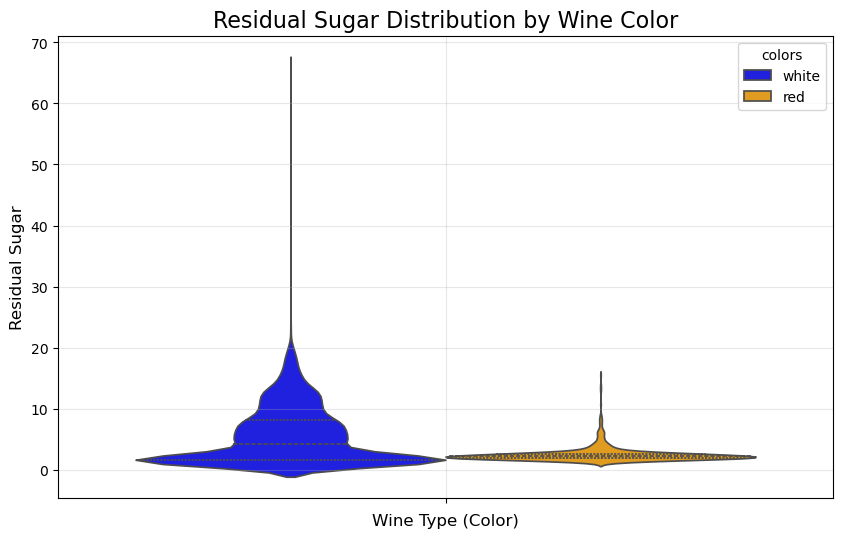

         count      mean       std  min  25%  50%  75%   max
colors                                                      
red     1139.0  2.493635  1.257423  1.2  1.9  2.2  2.6  15.5
white   3189.0  5.511320  4.660891  0.7  1.6  4.2  8.2  65.8


In [141]:
# YOUR CODE HERE
# raise NotImplementedError()
# Violin plot to compare residual sugar by wine color
plt.figure(figsize=(10, 6))
sns.violinplot(data=raw_df, hue='colors', y='residual sugar', palette={'red': 'orange', 'white': 'blue'}, inner='quartile')
plt.title("Residual Sugar Distribution by Wine Color", fontsize=16)
plt.xlabel("Wine Type (Color)", fontsize=12)
plt.ylabel("Residual Sugar", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Calculate mean, median, and standard deviation
stats = raw_df.groupby('colors')['residual sugar'].describe()
print(stats)


#### Task 17: Analyze the relationship between color and total sulfur content in wine

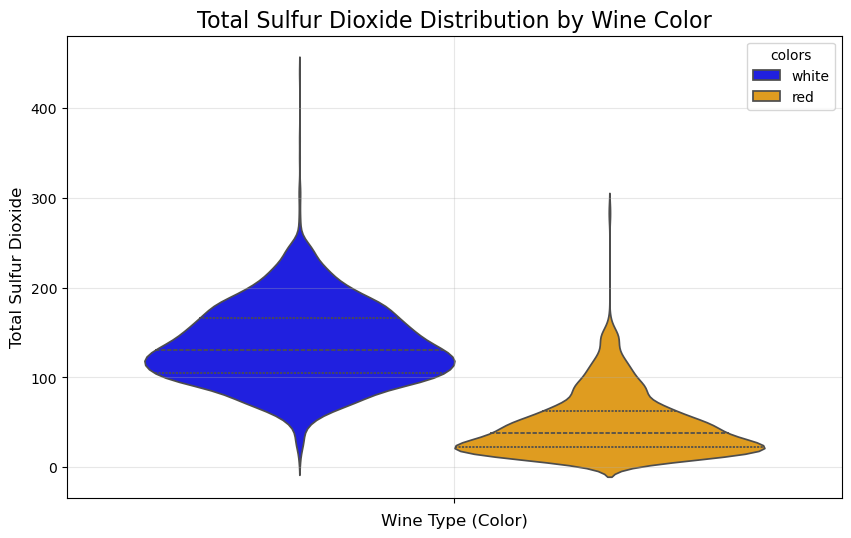

         count        mean        std  min    25%    50%    75%    max
colors                                                                
red     1139.0   47.152766  33.993453  6.0   22.0   38.0   63.0  289.0
white   3189.0  136.419724  43.941114  9.0  105.0  131.0  166.0  440.0


In [142]:
# YOUR CODE HERE
# raise NotImplementedError()
# Violin plot to compare total sulfur dioxide by wine color
plt.figure(figsize=(10, 6))
sns.violinplot(data=raw_df, hue='colors', y='total sulfur dioxide', palette={'red': 'orange', 'white': 'blue'}, inner='quartile')
plt.title("Total Sulfur Dioxide Distribution by Wine Color", fontsize=16)
plt.xlabel("Wine Type (Color)", fontsize=12)
plt.ylabel("Total Sulfur Dioxide", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Calculate mean, median, and standard deviation
stats = raw_df.groupby('colors')['total sulfur dioxide'].describe()
print(stats)

#### Task 18: Analyze the relationship between color and free sulfur content in wine

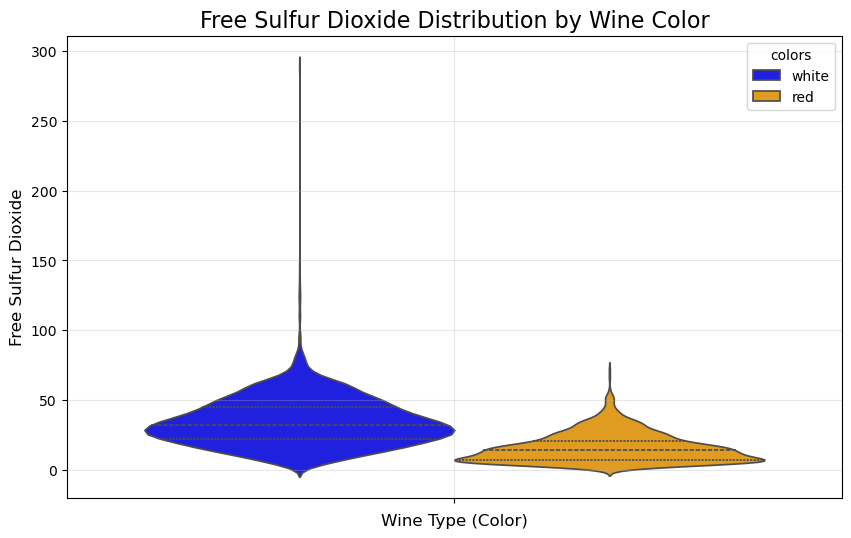

         count       mean        std  min   25%   50%   75%    max
colors                                                            
red     1139.0  15.929763  10.392575  1.0   7.0  14.0  21.0   72.0
white   3189.0  34.524459  17.408865  2.0  22.0  32.0  45.0  289.0


In [143]:
# YOUR CODE HERE
# raise NotImplementedError()
# Violin plot to compare free sulfur dioxide by wine color
plt.figure(figsize=(10, 6))
sns.violinplot(data=raw_df, hue='colors', y='free sulfur dioxide', palette={'red': 'orange', 'white': 'blue'}, inner='quartile')
plt.title("Free Sulfur Dioxide Distribution by Wine Color", fontsize=16)
plt.xlabel("Wine Type (Color)", fontsize=12)
plt.ylabel("Free Sulfur Dioxide", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Calculate mean, median, and standard deviation
stats = raw_df.groupby('colors')['free sulfur dioxide'].describe()
print(stats)

#### Task 19: Analyze the relationship between color and acidity of wine

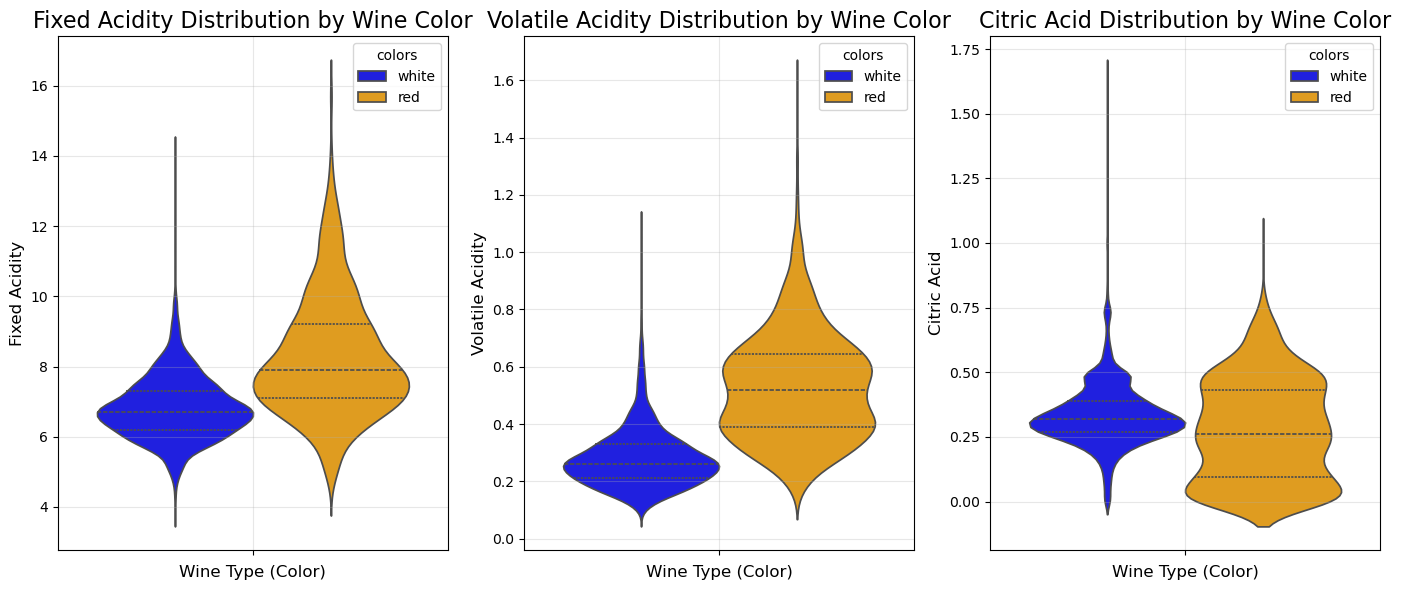

       fixed acidity                                                \
               count      mean       std  min  25%  50%  75%   max   
colors                                                               
red           1139.0  8.287884  1.725696  4.6  7.1  7.9  9.2  15.9   
white         3189.0  6.820712  0.890532  3.8  6.2  6.7  7.3  14.2   

       volatile acidity                                                      
                  count      mean       std    min   25%   50%    75%   max  
colors                                                                       
red              1139.0  0.531172  0.188279  0.160  0.39  0.52  0.645  1.58  
white            3189.0  0.281706  0.106430  0.085  0.21  0.26  0.330  1.10  
       citric acid                                                  
             count      mean       std  min    25%   50%   75%   max
colors                                                              
red         1139.0  0.273477  0.196370  0.0  0.095  

In [144]:
# YOUR CODE HERE
# raise NotImplementedError()

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.violinplot(data=raw_df, hue='colors', y='fixed acidity', palette={'red': 'orange', 'white': 'blue'}, inner='quartile', ax=axes[0])
axes[0].set_title("Fixed Acidity Distribution by Wine Color", fontsize=16)
axes[0].set_xlabel("Wine Type (Color)", fontsize=12)
axes[0].set_ylabel("Fixed Acidity", fontsize=12)
axes[0].grid(alpha=0.3)

sns.violinplot(data=raw_df, hue='colors', y='volatile acidity', palette={'red': 'orange', 'white': 'blue'}, inner='quartile', ax=axes[1])
axes[1].set_title("Volatile Acidity Distribution by Wine Color", fontsize=16)
axes[1].set_xlabel("Wine Type (Color)", fontsize=12)
axes[1].set_ylabel("Volatile Acidity", fontsize=12)
axes[1].grid(alpha=0.3)

sns.violinplot(data=raw_df, hue='colors', y='citric acid', palette={'red': 'orange', 'white': 'blue'}, inner='quartile', ax=axes[2])
axes[2].set_title("Citric Acid Distribution by Wine Color", fontsize=16)
axes[2].set_xlabel("Wine Type (Color)", fontsize=12)
axes[2].set_ylabel("Citric Acid", fontsize=12)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate mean, median, and standard deviation
stats = raw_df.groupby('colors')[['fixed acidity', 'volatile acidity']].describe()
print(stats)
stats = raw_df.groupby('colors')[['citric acid']].describe()
print(stats)

### Correlation analysis between variables based on color

#### Task 20: Investigate the correlation between density and wine quality based on color

In [145]:
# YOUR CODE HERE
# raise NotImplementedError()
red_correlation = raw_red[['density', 'quality']].corr()
print("Correlation for Red Wine:")
print(red_correlation.iloc[-1:, :-1])

# Correlation for white wine
white_correlation = raw_white[['density', 'quality']].corr()
print("Correlation for White Wine:")
print(white_correlation.iloc[-1:, :-1])



Correlation for Red Wine:
          density
quality -0.199894
Correlation for White Wine:
          density
quality -0.343549


#### Task 21: Investigate the correlation between alcohol concentration and wine quality based on color

In [146]:
# YOUR CODE HERE
# raise NotImplementedError()
# Correlation for red wine
red_correlation = raw_red[['alcohol', 'quality']].corr()
print("Correlation for Red Wine:")
print(red_correlation.iloc[-1:, :-1])

# Correlation for white wine
white_correlation = raw_white[['alcohol', 'quality']].corr()
print("Correlation for White Wine:")
print(white_correlation.iloc[-1:, :-1])

Correlation for Red Wine:
          alcohol
quality  0.486878
Correlation for White Wine:
          alcohol
quality  0.461514


#### Task 22: Investigate the correlation between salt content and wine quality based on color

In [147]:
# YOUR CODE HERE
# raise NotImplementedError()
# Correlation for red wine
red_correlation = raw_red[['chlorides', 'quality']].corr()
print("Correlation for Red Wine:")
print(red_correlation.iloc[-1:, :-1])

# Correlation for white wine
white_correlation = raw_white[['chlorides', 'quality']].corr()
print("Correlation for White Wine:")
print(white_correlation.iloc[-1:, :-1])

Correlation for Red Wine:
         chlorides
quality  -0.132698
Correlation for White Wine:
         chlorides
quality  -0.217543


#### Task 23: Investigate the correlation between acidity and wine quality based on color

In [148]:
# YOUR CODE HERE
# raise NotImplementedError()
# Correlation for red wine
red_correlation = raw_red[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']].corr()
print("Correlation for Red Wine:")
print(red_correlation.iloc[-1:, :-1])

# Correlation for white wine
white_correlation = raw_white[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']].corr()
print("Correlation for White Wine:")
print(white_correlation.iloc[-1:, :-1])


Correlation for Red Wine:
         fixed acidity  volatile acidity  citric acid
quality       0.110252         -0.404703     0.232096
Correlation for White Wine:
         fixed acidity  volatile acidity  citric acid
quality      -0.128575         -0.197965     0.025941


### Multi-attributes analysis

#### Task 24: Chlorides and Sulphates on wine quality

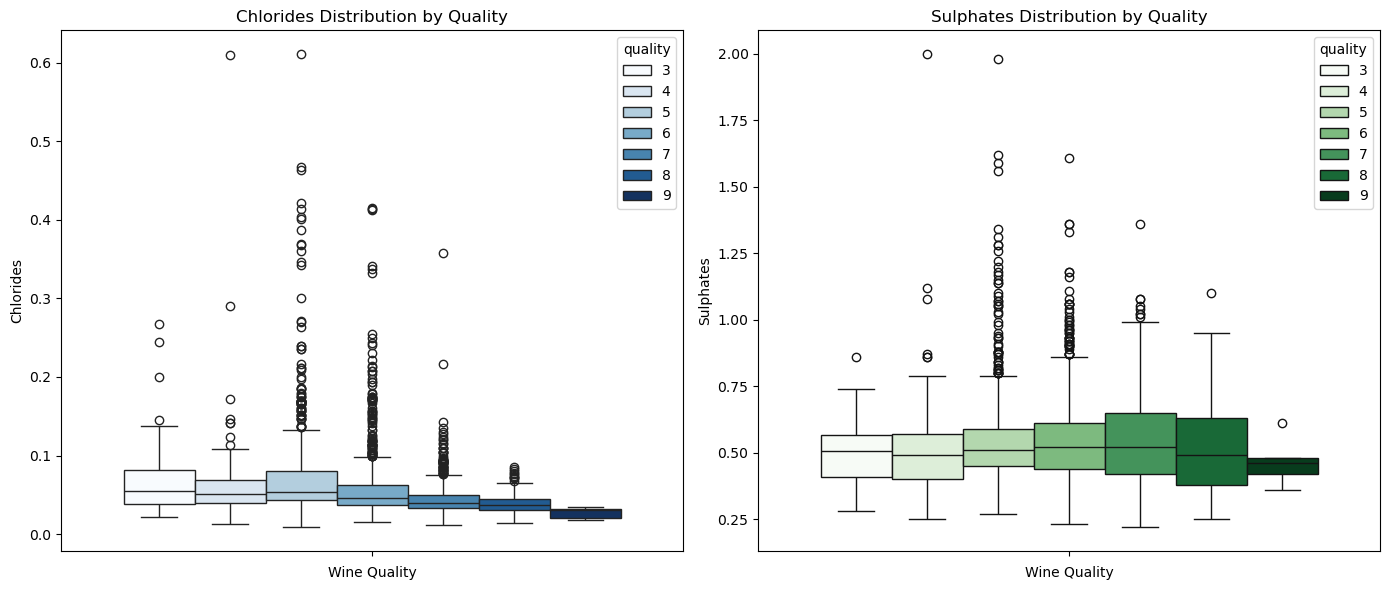

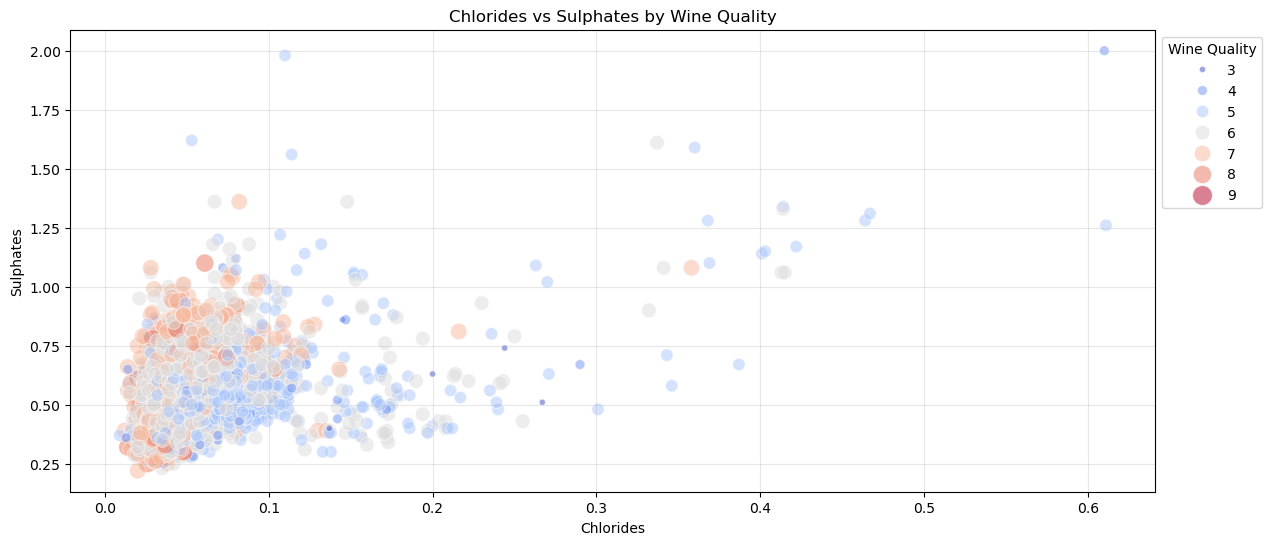

In [149]:
# YOUR CODE HERE
# raise NotImplementedError()

# Biểu đồ boxplot cho chlorides và sulphates theo quality
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=raw_df, hue='quality', y='chlorides', palette='Blues')
plt.title("Chlorides Distribution by Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Chlorides")

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_df, hue='quality', y='sulphates', palette='Greens')
plt.title("Sulphates Distribution by Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Sulphates")

plt.tight_layout()
plt.show()

# Biểu đồ phân tán
plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='chlorides', y='sulphates', hue='quality', size='quality', 
                sizes=(20, 200), palette='coolwarm', alpha=0.5)
plt.title("Chlorides vs Sulphates by Wine Quality")
plt.xlabel("Chlorides")
plt.ylabel("Sulphates")
plt.legend(title='Wine Quality', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.show()

In [150]:
# YOUR CODE HERE
# raise NotImplementedError()

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Mô hình hồi quy: Quality dựa trên Chlorides và Sulphates
model = ols("quality ~ chlorides + sulphates", data=raw_df).fit()
print(model.summary())

'''
Comment: 
    + Impact of chlorides:

        - The coefficient for chlorides is -6.0332, indicating a strong negative relationship with quality.
        - For every one-unit increase in chlorides, the quality decreases by an average of 6.0332 units, holding other variables constant.
    + Impact of sulphates:

        - The coefficient for sulphates is 0.8674, suggesting a positive relationship with quality.
        - For every one-unit increase in sulphates, the quality increases by an average of 0.8674 units, holding other variables constant.'''


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     134.2
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.77e-57
Time:                        22:49:44   Log-Likelihood:                -5515.0
No. Observations:                4328   AIC:                         1.104e+04
Df Residuals:                    4325   BIC:                         1.106e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6615      0.049    116.390      0.0

'\nComment: \n    + Impact of chlorides:\n\n        - The coefficient for chlorides is -6.0332, indicating a strong negative relationship with quality.\n        - For every one-unit increase in chlorides, the quality decreases by an average of 6.0332 units, holding other variables constant.\n    + Impact of sulphates:\n\n        - The coefficient for sulphates is 0.8674, suggesting a positive relationship with quality.\n        - For every one-unit increase in sulphates, the quality increases by an average of 0.8674 units, holding other variables constant.'

#### Task 25: Sulfur Dioxide Ratio and Volatile Acidity Ratio on wine quality

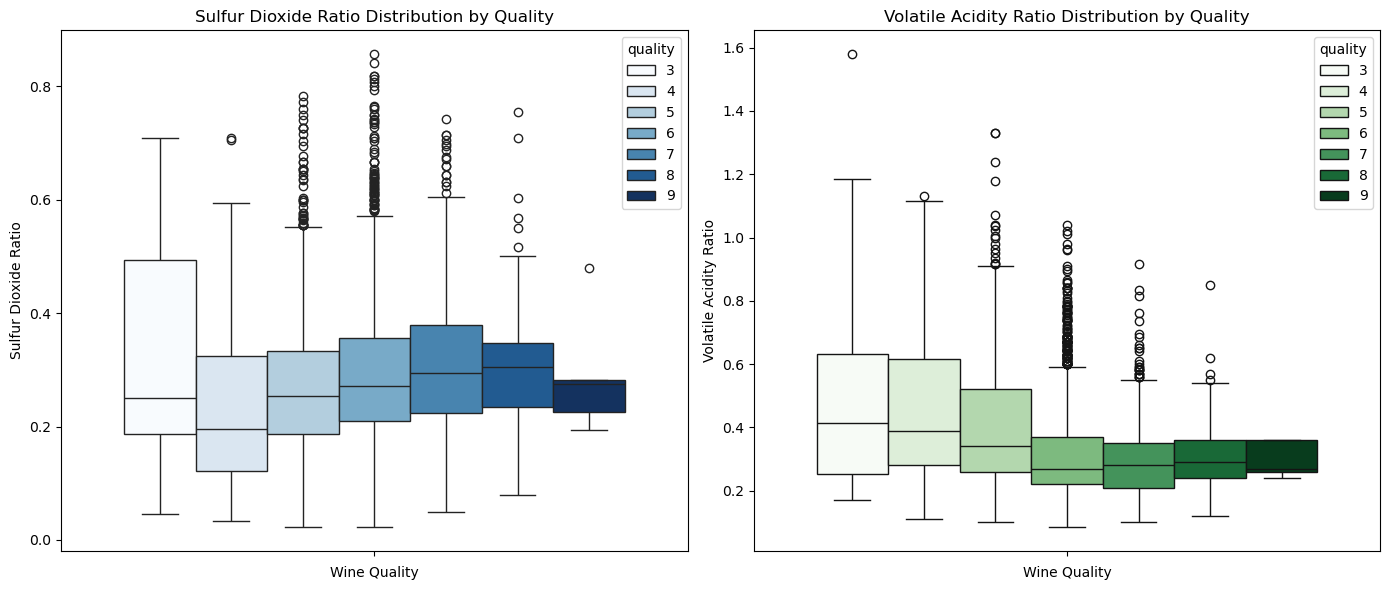

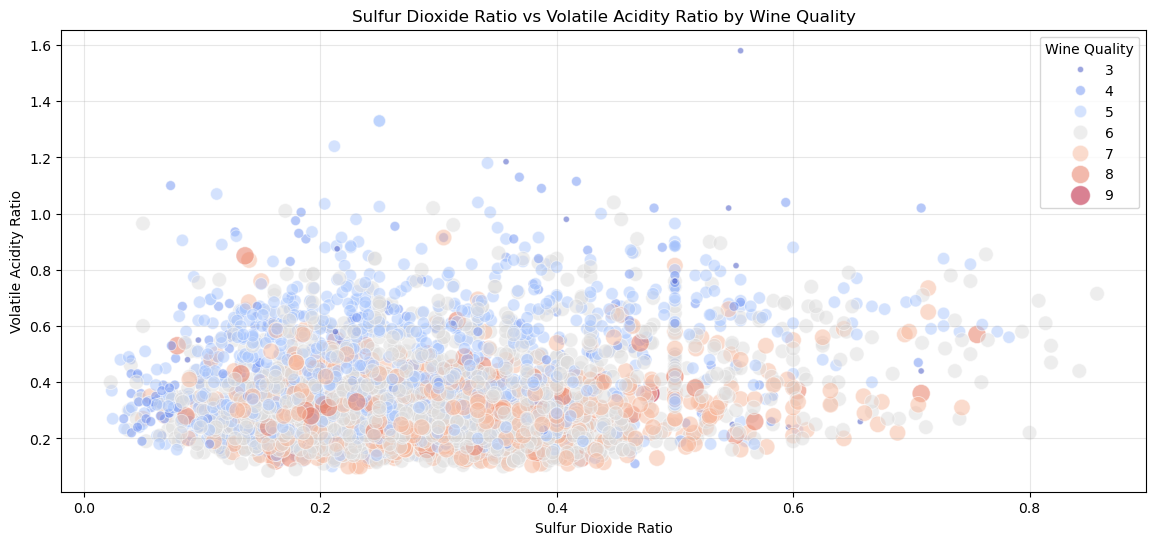

In [151]:
# YOUR CODE HERE
# raise NotImplementedError()
# raw_df.head()


# Biểu đồ boxplot cho Sulfur Dioxide Ratio và Volatile Acidity Ratio theo quality
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=raw_df, hue='quality', y='ratio', palette='Blues')
plt.title("Sulfur Dioxide Ratio Distribution by Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Sulfur Dioxide Ratio")

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_df, hue='quality', y='volatile acidity', palette='Greens')
plt.title("Volatile Acidity Ratio Distribution by Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Volatile Acidity Ratio")

plt.tight_layout()
plt.show()

# Biểu đồ phân tán
plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='ratio', y='volatile acidity', hue='quality', size='quality', 
                sizes=(20, 200), palette='coolwarm', alpha=0.5)
plt.title("Sulfur Dioxide Ratio vs Volatile Acidity Ratio by Wine Quality")
plt.xlabel("Sulfur Dioxide Ratio")
plt.ylabel("Volatile Acidity Ratio")
plt.legend(title='Wine Quality', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.show()

In [152]:
# YOUR CODE HERE
# raise NotImplementedError()

# Xác định biến độc lập (X) và biến phụ thuộc (y)
X = raw_df[['ratio', 'volatile acidity']]
y = raw_df['quality']

# Thêm cột intercept (hằng số) vào X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị kết quả của mô hình hồi quy
print(model.summary())

'''Comment:  
    + Impact of Sulfur Dioxide Ratio:  
        - The coefficient for Sulfur Dioxide Ratio is 1.2386, indicating a strong positive relationship with wine quality.  
        - For every one-unit increase in the Sulfur Dioxide Ratio, the wine quality increases by an average of 1.2386 units, holding other variables constant.  

    + Impact of Volatile Acidity:  
        - The coefficient for Volatile Acidity is -1.5766, indicating a strong negative relationship with wine quality.  
        - For every one-unit increase in Volatile Acidity, the wine quality decreases by an average of 1.5766 units, holding other variables constant. 
''' 


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          2.94e-105
Time:                        22:49:46   Log-Likelihood:                -5404.5
No. Observations:                4328   AIC:                         1.081e+04
Df Residuals:                    4325   BIC:                         1.083e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.9715      0.038  

'Comment:  \n    + Impact of Sulfur Dioxide Ratio:  \n        - The coefficient for Sulfur Dioxide Ratio is 1.2386, indicating a strong positive relationship with wine quality.  \n        - For every one-unit increase in the Sulfur Dioxide Ratio, the wine quality increases by an average of 1.2386 units, holding other variables constant.  \n\n    + Impact of Volatile Acidity:  \n        - The coefficient for Volatile Acidity is -1.5766, indicating a strong negative relationship with wine quality.  \n        - For every one-unit increase in Volatile Acidity, the wine quality decreases by an average of 1.5766 units, holding other variables constant. \n'

#### Task 26: Volatile Acidity and Alcohol on wine quality

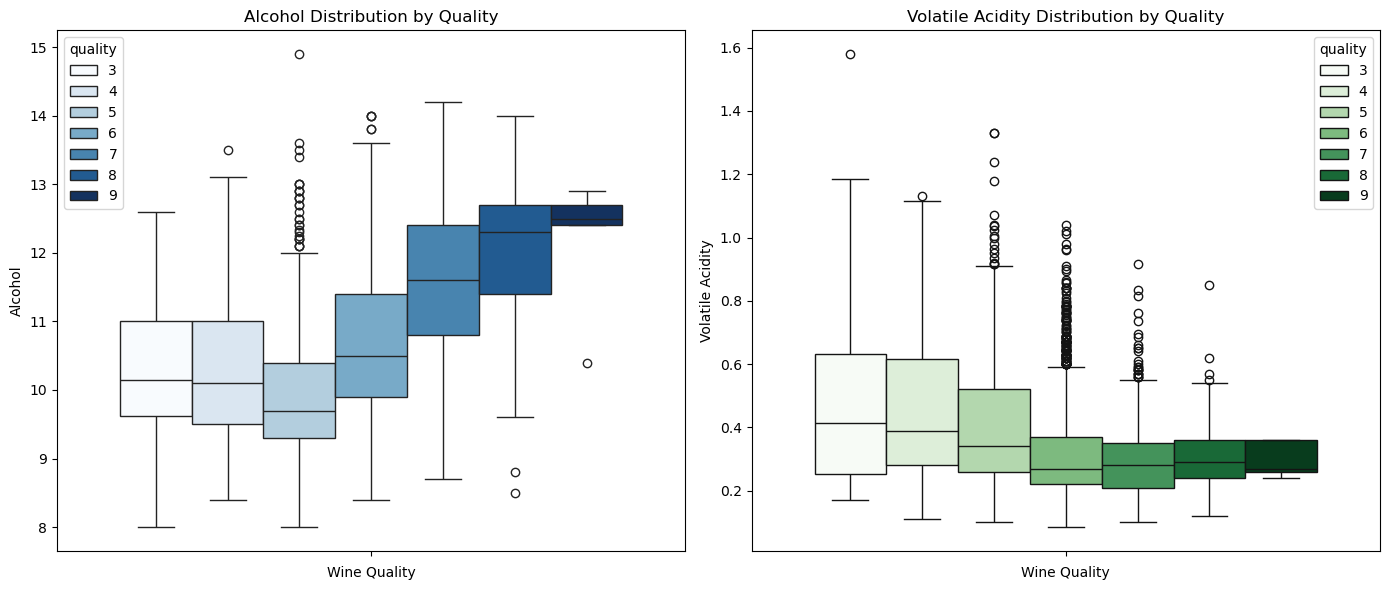

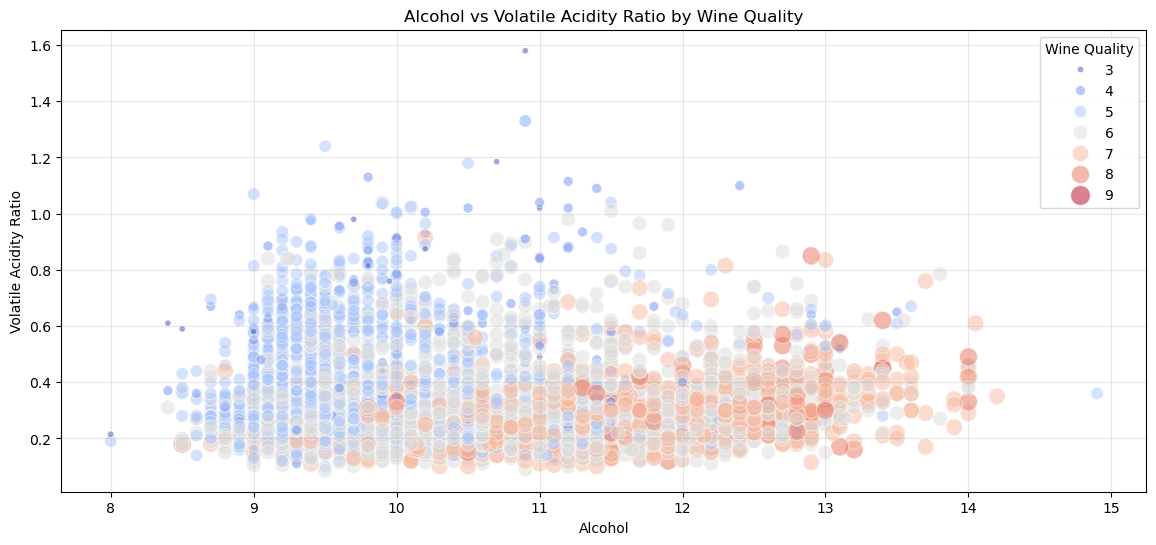

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     832.3
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          1.54e-306
Time:                        22:49:47   Log-Likelihood:                -4940.7
No. Observations:                4328   AIC:                             9887.
Df Residuals:                    4325   BIC:                             9906.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5779      0.109  

'\n\nComment:\n\n    + Impact of Alcohol:\n\n        - The coefficient for alcohol is 0.3421, indicating a positive relationship with wine quality.\n        - For every one-unit increase in alcohol, the wine quality increases by an average of 0.3421 units, holding other variables constant.\n        - The relationship is statistically significant, as the p-value (P>|t|) is less than 0.001.\n\n    + Impact of Volatile Acidity:\n\n        - The coefficient for volatile acidity is -1.2197, indicating a strong negative relationship with wine quality.\n        - For every one-unit increase in volatile acidity, the wine quality decreases by an average of 1.2197 units, holding other variables constant.\n        - The relationship is statistically significant, as the p-value (P>|t|) is less than 0.001.\n\n    + Conclusion:\n\n        - Alcohol has a positive and significant impact on wine quality, while volatile acidity has a negative and significant impact.\n        - The magnitude of the coef

In [153]:
# YOUR CODE HERE
# raise NotImplementedError()

# Biểu đồ boxplot cho Volatile Acidity and Alcohol theo quality
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=raw_df, hue='quality', y='alcohol', palette='Blues')
plt.title("Alcohol Distribution by Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol")

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_df, hue='quality', y='volatile acidity', palette='Greens')
plt.title("Volatile Acidity Distribution by Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Volatile Acidity")

plt.tight_layout()
plt.show()

# Biểu đồ phân tán
plt.figure(figsize=(14, 6))
sns.scatterplot(data=raw_df, x='alcohol', y='volatile acidity', hue='quality', size='quality', 
                sizes=(20, 200), palette='coolwarm', alpha=0.5)
plt.title("Alcohol vs Volatile Acidity Ratio by Wine Quality")
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity Ratio")
plt.legend(title='Wine Quality', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.show()

# Xác định biến độc lập (X) và biến phụ thuộc (y)
X = raw_df[['alcohol', 'volatile acidity']]
y = raw_df['quality']

# Thêm cột intercept (hằng số) vào X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị kết quả của mô hình hồi quy
print(model.summary())

'''

Comment:

    + Impact of Alcohol:

        - The coefficient for alcohol is 0.3421, indicating a positive relationship with wine quality.
        - For every one-unit increase in alcohol, the wine quality increases by an average of 0.3421 units, holding other variables constant.
        - The relationship is statistically significant, as the p-value (P>|t|) is less than 0.001.

    + Impact of Volatile Acidity:

        - The coefficient for volatile acidity is -1.2197, indicating a strong negative relationship with wine quality.
        - For every one-unit increase in volatile acidity, the wine quality decreases by an average of 1.2197 units, holding other variables constant.
        - The relationship is statistically significant, as the p-value (P>|t|) is less than 0.001.

    + Conclusion:

        - Alcohol has a positive and significant impact on wine quality, while volatile acidity has a negative and significant impact.
        - The magnitude of the coefficient suggests that volatile acidity has a stronger influence on reducing wine quality compared to the enhancing effect of alcohol.
''' 


### Main Factors Influencing Wine Quality

Based on the above analysis, you should decide what factors affect wine quality.

In [154]:
# YOUR CODE HERE
# raise NotImplementedError()

# Chọn các biến đầu vào và chất lượng là biến mục tiêu
X = raw_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'ratio']]
y = raw_df['quality']

# Thêm một hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy OLS
model = sm.OLS(y, X).fit()

# Hiển thị kết quả mô hình
print(model.summary())

'''
Based on the analysis, the following factors are necessary for determining wine quality:

    - Fixed acidity: This factor has a p-value of 0.024, which is below 0.05, indicating statistical significance. The negative coefficient of -0.0309 suggests that as fixed acidity increases, the quality of the wine decreases.

    - Volatile acidity: With a p-value of 0.000 (much lower than 0.05), this factor is highly significant. The coefficient of -1.3210 indicates that an increase in volatile acidity significantly lowers wine quality.

    - Citric acid: This factor has a p-value of 0.011, which is also below 0.05, suggesting statistical significance. The positive coefficient of 0.2553 means that higher citric acid levels are associated with improved wine quality.

    - Density: With a p-value of 0.015, this factor is statistically significant. The positive coefficient of 25.2488 suggests that an increase in density is associated with a higher wine quality.

    - Alcohol: The p-value of 0.000, combined with a positive coefficient of 0.3634, indicates a strong and significant positive effect of alcohol content on wine quality.

    - Ratio(SO2): The ratio factor, with a p-value of 0.000 and a coefficient of 1.0569, also demonstrates a significant and positive relationship with wine quality.

In summary, the factors with p-values less than 0.05, such as:

    + Volatile acidity
    + Alcohol 
    + Density
    + Citric acid
    + Fixed acidity
    + Ratio(SO2) 

significantly affect wine quality. The sign of the coefficient (positive or negative) further indicates whether the relationship is direct or inverse.

'''

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:49:47   Log-Likelihood:                -4875.2
No. Observations:                4328   AIC:                             9772.
Df Residuals:                    4317   BIC:                             9843.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -22.8404 

'\nBased on the analysis, the following factors are necessary for determining wine quality:\n\n    - Fixed acidity: This factor has a p-value of 0.024, which is below 0.05, indicating statistical significance. The negative coefficient of -0.0309 suggests that as fixed acidity increases, the quality of the wine decreases.\n\n    - Volatile acidity: With a p-value of 0.000 (much lower than 0.05), this factor is highly significant. The coefficient of -1.3210 indicates that an increase in volatile acidity significantly lowers wine quality.\n\n    - Citric acid: This factor has a p-value of 0.011, which is also below 0.05, suggesting statistical significance. The positive coefficient of 0.2553 means that higher citric acid levels are associated with improved wine quality.\n\n    - Density: With a p-value of 0.015, this factor is statistically significant. The positive coefficient of 25.2488 suggests that an increase in density is associated with a higher wine quality.\n\n    - Alcohol: The 